# Progetto Finale Data Analysis: introduzione

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Analisi esplorativa delle risorse a disposizione

In [516]:
import pandas as pd

In [517]:
Papers = pd.read_csv('Information_data Final Project.csv')

#### Esplorazione della struttura del **dataset**
![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

In [518]:
Papers.head()

,read_date,user_uuid,category,journalist_id,language,length,country,subscription_date,platform,article_id,stars
0,19-2-2022,190,sport,117,fr,long,fr,28-6-2021,tablet,331708,2
1,25-2-2021,243,art,117,it,short,it,24-8-2020,tablet,5128,3
2,19-12-2023,36,weather,115,en,long,uk,7-2-2021,tablet,733403,5
3,27-3-2023,162,finance,111,it,short,it,6-9-2022,tablet,612638,1
4,22-10-2023,181,economy,119,fr,short,fr,9-12-2020,tablet,211458,3


In [519]:
Papers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   read_date          999 non-null    object
 1   user_uuid          999 non-null    int64 
 2   category           999 non-null    object
 3   journalist_id      999 non-null    int64 
 4   language           999 non-null    object
 5   length             999 non-null    object
 6   country            999 non-null    object
 7   subscription_date  999 non-null    object
 8   platform           999 non-null    object
 9   article_id         999 non-null    int64 
 10  stars              999 non-null    int64 
dtypes: int64(4), object(7)
memory usage: 86.0+ KB


#### Struttura interna del **dataset**
![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
Il df mostra una struttura dati che presenta **non nullità di tutte le entries**. 

#### Procedura di conversione dei `datetime`

L'utilità di tale procedura sta nel fatto che ora possiamo **manipolare con più malleabilità** il campo data ed estrarre gli articoli inerenti il nostro arco temporale, ovvero il _2021_

In [520]:
# Conversione colonna 'read_date' e 'subscription_date' in formato data
Papers['read_date'] = pd.to_datetime(Papers['read_date'], format='%d-%m-%Y')
Papers['subscription_date']=pd.to_datetime(Papers['subscription_date'], format='%d-%m-%Y')
Papers.head()

,read_date,user_uuid,category,journalist_id,language,length,country,subscription_date,platform,article_id,stars
0,2022-02-19,190,sport,117,fr,long,fr,2021-06-28,tablet,331708,2
1,2021-02-25,243,art,117,it,short,it,2020-08-24,tablet,5128,3
2,2023-12-19,36,weather,115,en,long,uk,2021-02-07,tablet,733403,5
3,2023-03-27,162,finance,111,it,short,it,2022-09-06,tablet,612638,1
4,2023-10-22,181,economy,119,fr,short,fr,2020-12-09,tablet,211458,3


#### Selezione dell'arco temporale di riferimento `2021`, `2022`, `2023`

In [521]:
#Estrazione dei dati relativi al 2021 - 2022 - 2023

#2021
Papers_2021 = Papers[Papers['read_date'].dt.year == 2021]
Papers_2021 = Papers_2021.reset_index()
Papers_2021.drop('index', axis=1, inplace=True)

#2022
Papers_2022 = Papers[Papers['read_date'].dt.year == 2022]
Papers_2022 = Papers_2022.reset_index()
Papers_2022.drop('index', axis=1, inplace=True)

#2023
Papers_2023 = Papers[Papers['read_date'].dt.year == 2023]
Papers_2023 = Papers_2023.reset_index()
Papers_2023.drop('index', axis=1, inplace=True)

#### Monitoraggio della distribuzione delle **letture** - **analisi SU TUTTO L'ARCO TEMPORALE**
![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

In [522]:
cat = Papers.groupby('category').size()
cat

category
art           61
economy      111
finance      134
lifestyle     76
news         105
sport        191
weather      321
dtype: int64

In [523]:
sum_cat = cat.sum()
sum_cat

999

In [524]:
#Rivisitiamo il tutto come percentuale aggregata GENERALE
category_percent = (cat / sum_cat)*100
category_percent

category
art           6.106106
economy      11.111111
finance      13.413413
lifestyle     7.607608
news         10.510511
sport        19.119119
weather      32.132132
dtype: float64

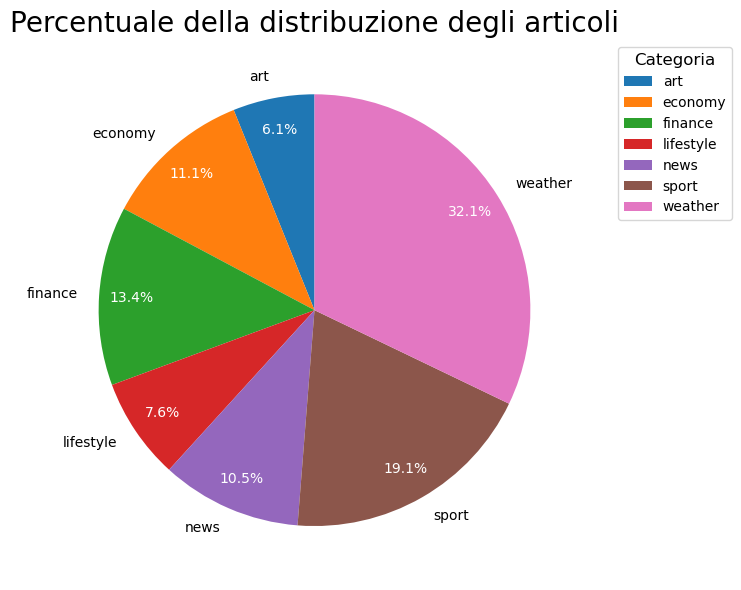

In [525]:
# Configurazione del grafico
fig, ax = plt.subplots(figsize=(10, 6))

# Grafico a torta
wedges, texts, autotexts = ax.pie(category_percent, labels=category_percent.index, autopct='%1.1f%%', startangle=90, pctdistance=0.85)

# edit etichette
for autotext in autotexts:
    autotext.set_color('white')
    
    
ax.legend(title='Categoria', title_fontsize=12, fontsize=10, bbox_to_anchor=(1.05, 1), loc='upper left')
    
title = 'Percentuale della distribuzione degli articoli' 
ax.set_title(title, fontsize=20)

# Mostra il grafico
plt.tight_layout()
plt.savefig('01_reading_cat.png')
plt.show()



Come si può evincere dal **grafico a torta**, al **su TUTTO L'ARCO TEMPORALE**
>> **`weather`**, con il **32,1%** - quasi 1 articolo su 3 -, risulta la categoria **più letta**
>>
>> a seguirla vi sono **`sport`** e **`finance`**, con il **`19,1%`** e il **`13,4%`**

#### Monitoraggio della distribuzione delle **letture** - **analisi sui tre anni** **`2021 - 2022 - 2023`**
![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

#### **2021**

In [526]:
cat_2021 = Papers_2021.groupby('category').size()
cat_2021

category
art           4
economy       9
finance      15
lifestyle    13
news         10
sport        15
weather      24
dtype: int64

In [527]:
sum_cat_2021 = cat_2021.sum()
sum_cat_2021

90

In [528]:
#Rivisitiamo il tutto come percentuale
category_percent_2021 = (cat_2021 / sum_cat_2021)*100
category_percent_2021

category
art           4.444444
economy      10.000000
finance      16.666667
lifestyle    14.444444
news         11.111111
sport        16.666667
weather      26.666667
dtype: float64

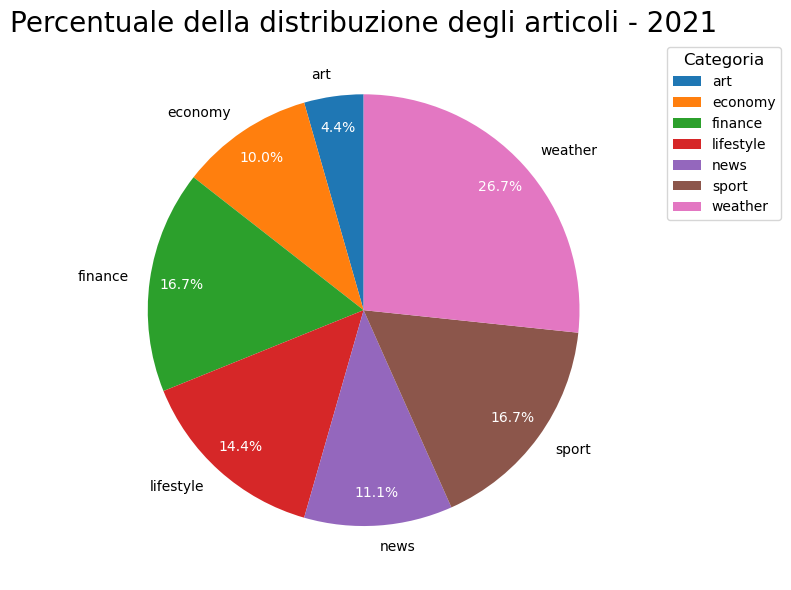

In [529]:
# Configurazione del grafico
fig, ax = plt.subplots(figsize=(10, 6))

# Grafico a torta
wedges, texts, autotexts = ax.pie(category_percent_2021, labels=category_percent.index, autopct='%1.1f%%', startangle=90, pctdistance=0.85)

# edit etichette
for autotext in autotexts:
    autotext.set_color('white')
    
    
ax.legend(title='Categoria', title_fontsize=12, fontsize=10, bbox_to_anchor=(1.05, 1), loc='upper left')
    
title = 'Percentuale della distribuzione degli articoli - 2021' 
ax.set_title(title, fontsize=20)

# Mostra il grafico
plt.tight_layout()
plt.savefig('01_reading_cat_2021.png')
plt.show()

#### **2022**

In [530]:
cat_2022 = Papers_2022.groupby('category').size()
cat_2022

category
art          19
economy      35
finance      41
lifestyle    28
news         24
sport        60
weather      93
dtype: int64

In [531]:
sum_cat_2022 = cat_2022.sum()
sum_cat_2022

300

In [532]:
#Rivisitiamo il tutto come percentuale
category_percent_2022 = (cat_2022 / sum_cat_2022)*100
category_percent_2022

category
art           6.333333
economy      11.666667
finance      13.666667
lifestyle     9.333333
news          8.000000
sport        20.000000
weather      31.000000
dtype: float64

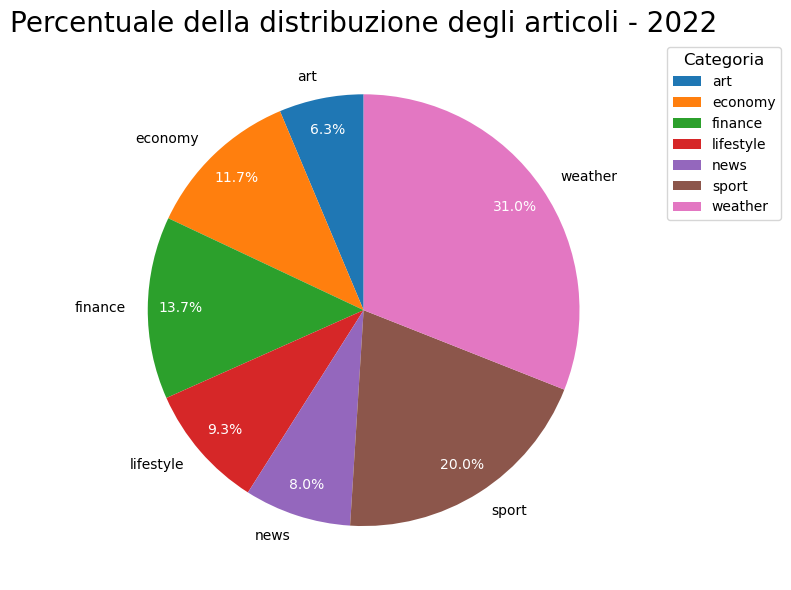

In [533]:
# Configurazione del grafico
fig, ax = plt.subplots(figsize=(10, 6))

# Grafico a torta
wedges, texts, autotexts = ax.pie(category_percent_2022, labels=category_percent.index, autopct='%1.1f%%', startangle=90, pctdistance=0.85)

# edit etichette
for autotext in autotexts:
    autotext.set_color('white')
    
    
ax.legend(title='Categoria', title_fontsize=12, fontsize=10, bbox_to_anchor=(1.05, 1), loc='upper left')
    
title = 'Percentuale della distribuzione degli articoli - 2022' 
ax.set_title(title, fontsize=20)

# Mostra il grafico
plt.tight_layout()
plt.savefig('01_reading_cat_2022.png')
plt.show()

#### **2023**

In [534]:
cat_2023 = Papers_2023.groupby('category').size()
cat_2023

category
art           38
economy       67
finance       78
lifestyle     35
news          71
sport        116
weather      204
dtype: int64

In [535]:
sum_cat_2023 = cat_2023.sum()
sum_cat_2023

609

In [536]:
#Rivisitiamo il tutto come percentuale
category_percent_2023 = (cat_2023 / sum_cat_2023)*100
category_percent_2023

category
art           6.239737
economy      11.001642
finance      12.807882
lifestyle     5.747126
news         11.658456
sport        19.047619
weather      33.497537
dtype: float64

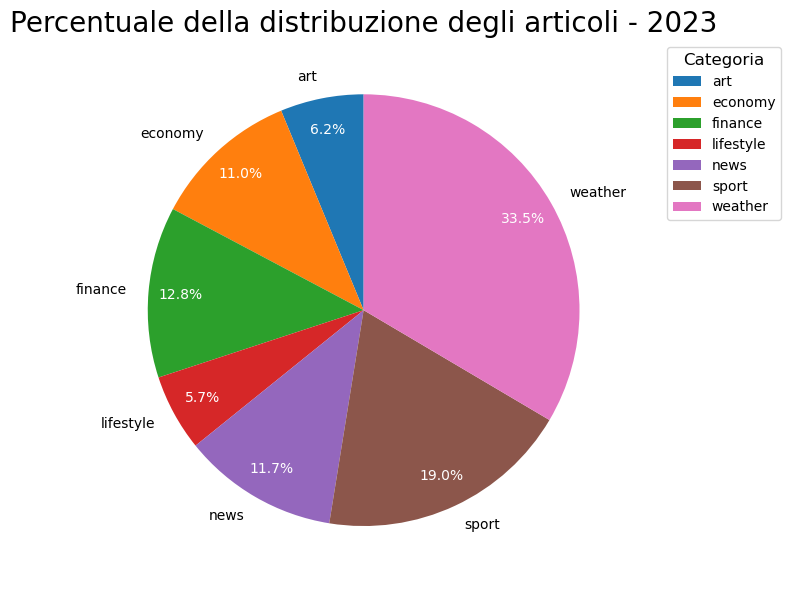

In [537]:
# Configurazione del grafico
fig, ax = plt.subplots(figsize=(10, 6))

# Grafico a torta
wedges, texts, autotexts = ax.pie(category_percent_2023, labels=category_percent.index, autopct='%1.1f%%', startangle=90, pctdistance=0.85)

# edit etichette
for autotext in autotexts:
    autotext.set_color('white')
    
    
ax.legend(title='Categoria', title_fontsize=12, fontsize=10, bbox_to_anchor=(1.05, 1), loc='upper left')
    
title = 'Percentuale della distribuzione degli articoli - 2023' 
ax.set_title(title, fontsize=20)

# Mostra il grafico
plt.tight_layout()
plt.savefig('01_reading_cat_2023.png')
plt.show()

#### Monitoraggio della _distribuzione_ delle **valutazioni** `stars` - **Analisi aggregata**
![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

In [538]:
stars = Papers.groupby('stars').stars.value_counts()
stars

stars
1    206
2    194
3    195
4    216
5    188
Name: count, dtype: int64

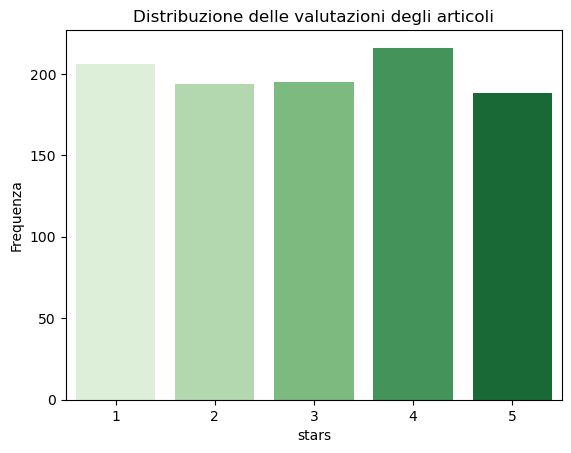

In [539]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# estrazione della variabile valutazione
stars = pd.DataFrame(Papers, columns=['stars'])

# Plot istogramma a barre utilizzando la libreria Seaborn
sns.countplot(x='stars', data=stars, palette='Greens')

# titoli e etichette
plt.title('Distribuzione delle valutazioni degli articoli')
plt.xlabel('stars')
plt.ylabel('Frequenza')

# Mostra il grafico
plt.savefig('00_reading_avg_stars.png')
plt.show()

#### Monitoraggio distribuzione **valutazioni** per **`category`** - Analisi **aggregata**

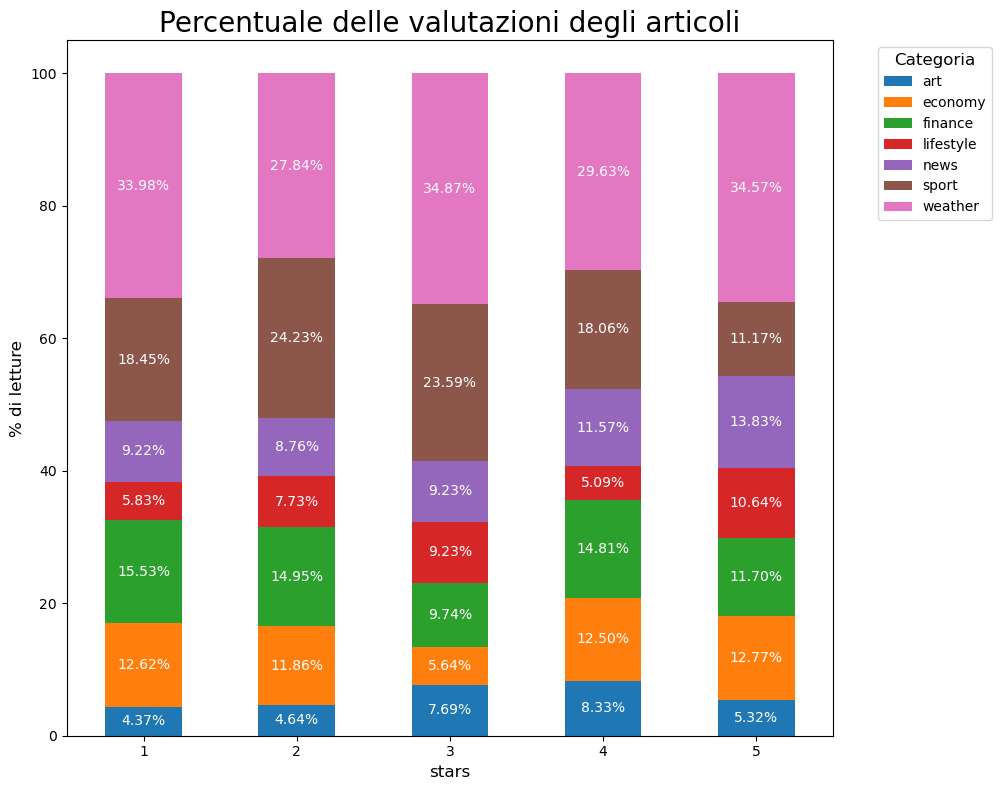

In [540]:
# Contiamo le occorrenze di ognuna delle combinazioni di 'category' e 'stars'
stars_cat = Papers.groupby(['stars', 'category']).size().unstack()

stars_cat
# Calcolo i totali per ciascuna categoria
cat_stars_tot = stars_cat.sum(axis=1)

#Rivisitiamo il tutto come percentuale di categoria
category_stars_percent = stars_cat.div(cat_stars_tot, axis=0) * 100
category_stars_percent


#bar chart stacked
ax = category_stars_percent.plot(kind='bar', stacked=True, figsize=(12, 8))

#etichette percentuali
for container in ax.containers:
    labels = [f'{h:.2f}%' if h >= 3 else '' for h in container.datavalues]
    ax.bar_label(container, labels=labels, label_type='center', fontsize=10, color='white')


#post edit grafico
plt.title('Percentuale delle valutazioni degli articoli', fontsize=20)
plt.xlabel('stars', fontsize=12)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
plt.ylabel('% di letture', fontsize=12)
plt.legend(title='Categoria', title_fontsize=12, fontsize=10, bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.savefig('01_reading_avg_stars_cat_perc.png')
plt.show()

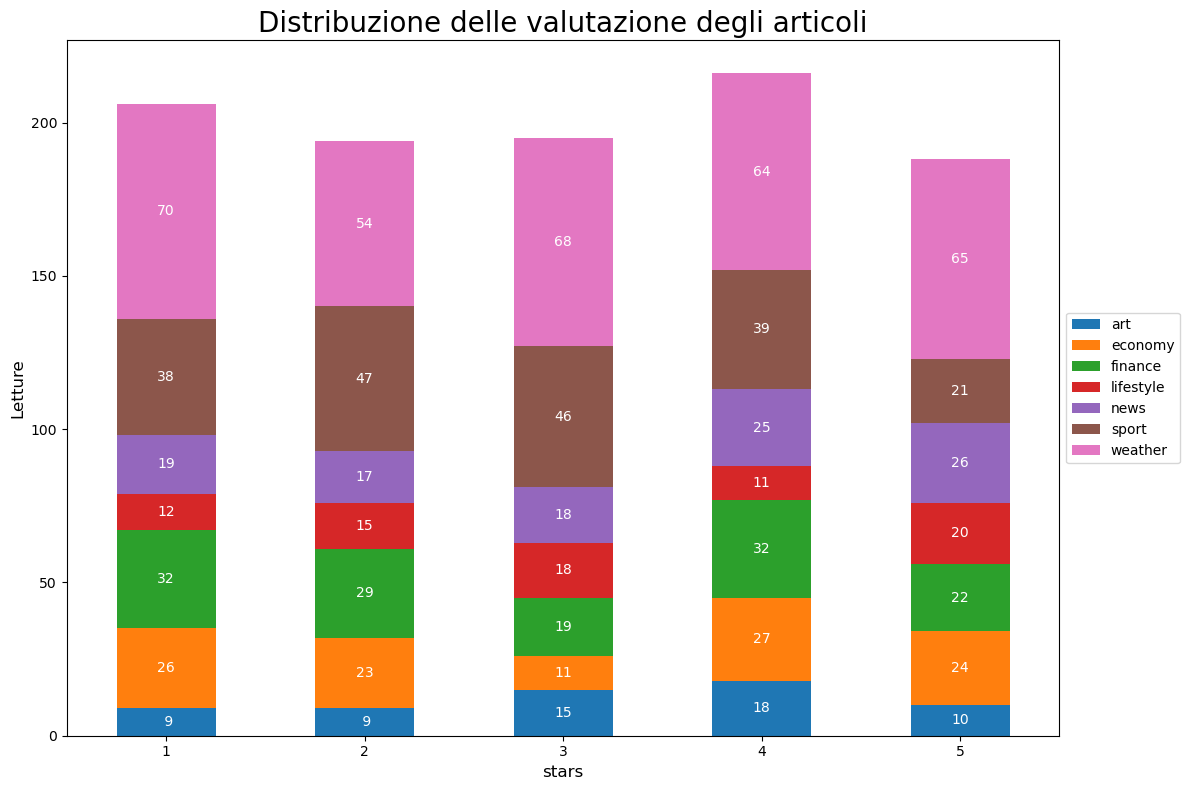

In [541]:
fig, ax = plt.subplots(figsize=(12, 8))
stars_cat.plot(kind='bar', stacked=True, ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.set_title('Distribuzione delle valutazione degli articoli', fontsize=20)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylabel('Letture', fontsize=12)
plt.xlabel('stars', fontsize=12)

#etichette assolute
for container in ax.containers:
    labels = [f'{h:2.0f}' if h >= 1 else '' for h in container.datavalues]
    ax.bar_label(container, labels=labels, label_type='center', fontsize=10, color='white')


plt.tight_layout()  # set della posizioni nel grafico
plt.savefig('01_reading_avg_stars_cat.png')
plt.show()

#### Monitoraggio della _distribuzione_ delle **valutazioni** `stars` - **Analisi annuale**
![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

#### 2021

In [542]:
stars = Papers_2021.groupby('stars').stars.value_counts()
stars

stars
1    27
2    17
3     9
4    16
5    21
Name: count, dtype: int64

Dal punto di vista delle _valutazioni_, ad un primo sguardo, esse **NON sembrano _EQUAMENTE DISTRIBUITE_**: a corredo di questa prima analisi proviamo a dare uno sguardo attraverso l'ausilio di un **istogramma** e capire come sono distribuite attraverso le varie **CATEGORIE**.

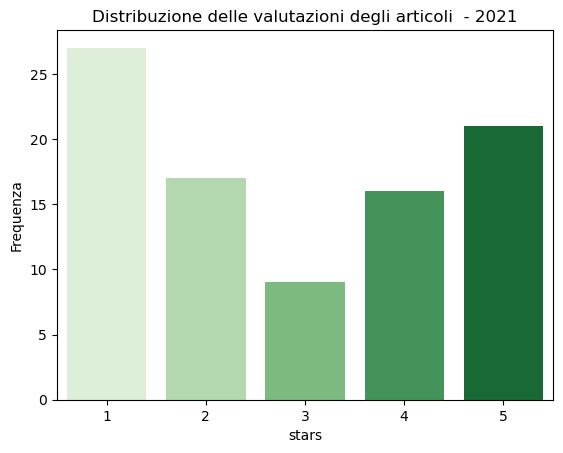

In [543]:

# estrazione della variabile valutazione
stars = pd.DataFrame(Papers_2021, columns=['stars'])

# Plot istogramma a barre utilizzando la libreria Seaborn
sns.countplot(x='stars', data=stars, palette='Greens')

# titoli e etichette
plt.title('Distribuzione delle valutazioni degli articoli  - 2021')
plt.xlabel('stars')
plt.ylabel('Frequenza')

# Mostra il grafico
plt.savefig('00_reading_avg_stars_2021.png')
plt.show()

Come è possibile osservare, la distribuzione mostra una sorta di **comportamento parabolico convesso**:
>> dalla categoria di **valutazione media** `1`, la _peggiore_, il numero di `letture di articoli` scende,
>>
>> fino al raggiungimento di un `punto di minimo` coincidente con la categoria di valutazione `3`,
>>
>> per poi risalire la china fino alla categoria `5`
>>
Si presenterebbe, dunque, una `distribuzione delle valutazioni delle letture` **`polarizzata`**, per cui vengono espresse principalmente valutazioni medie agli **estremi della scala di valori**

#### 2022

In [544]:
stars = Papers_2022.groupby('stars').stars.value_counts()
stars

stars
1    73
2    59
3    56
4    66
5    46
Name: count, dtype: int64

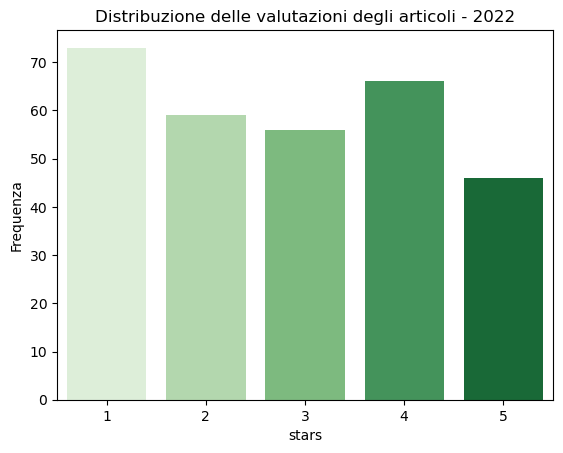

In [545]:
# estrazione della variabile valutazione
stars = pd.DataFrame(Papers_2022, columns=['stars'])

# Plot istogramma a barre utilizzando la libreria Seaborn
sns.countplot(x='stars', data=stars, palette='Greens')

# titoli e etichette
plt.title('Distribuzione delle valutazioni degli articoli - 2022')
plt.xlabel('stars')
plt.ylabel('Frequenza')

# Mostra il grafico
plt.savefig('00_reading_avg_stars_2022.png')
plt.show()

#### 2023

In [546]:
stars = Papers_2023.groupby('stars').stars.value_counts()
stars

stars
1    106
2    118
3    130
4    134
5    121
Name: count, dtype: int64

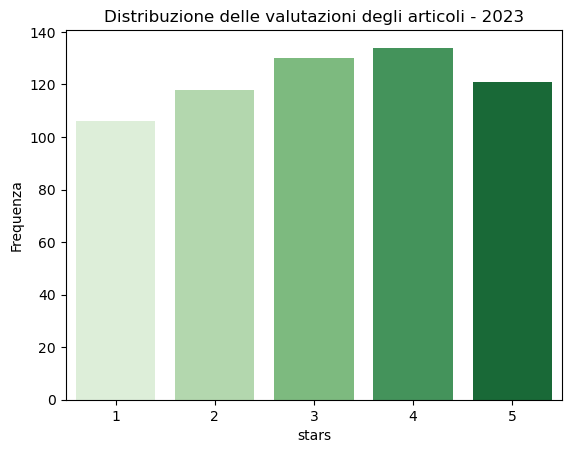

In [547]:
# estrazione della variabile valutazione
stars = pd.DataFrame(Papers_2023, columns=['stars'])

# Plot istogramma a barre utilizzando la libreria Seaborn
sns.countplot(x='stars', data=stars, palette='Greens')

# titoli e etichette
plt.title('Distribuzione delle valutazioni degli articoli - 2023')
plt.xlabel('stars')
plt.ylabel('Frequenza')

# Mostra il grafico
plt.savefig('00_reading_avg_stars_2023.png')
plt.show()

#### Distribuzione delle **valutazioni**: `categorie` - Concentrazione su analisi **2021** - SOSPETTO DI POLARIZZAZIONE **FONDATO**

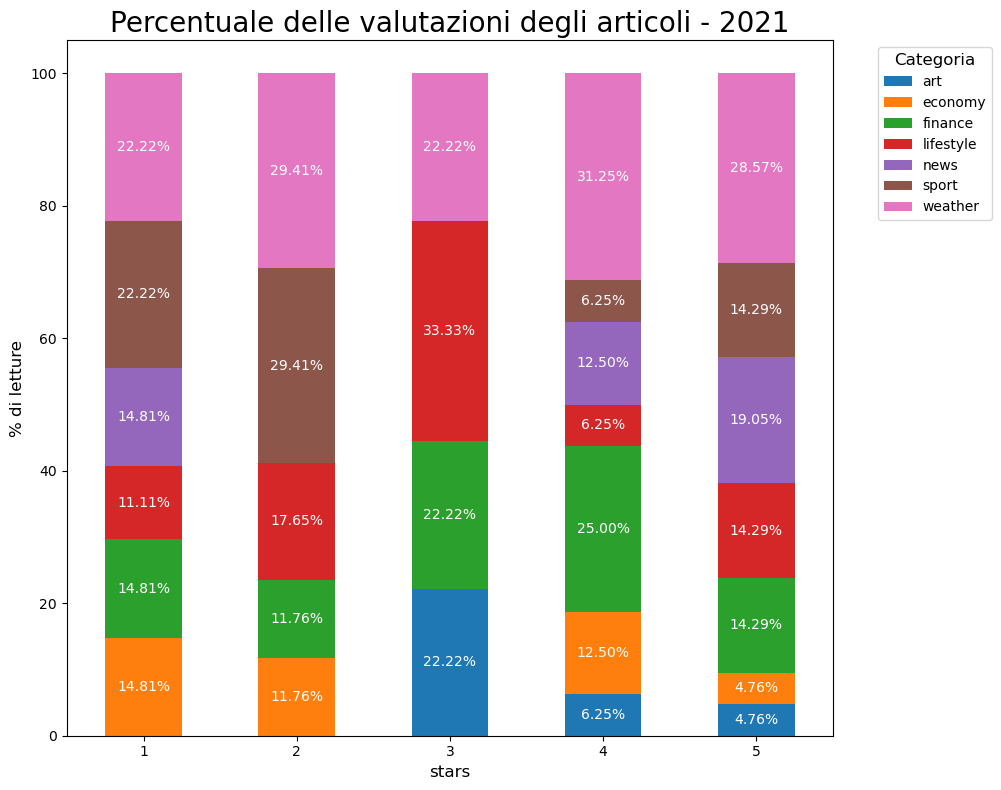

In [548]:

# Contiamo le occorrenze di ognuna delle combinazioni di 'category' e 'stars'
stars_cat = Papers_2021.groupby(['stars', 'category']).size().unstack()

stars_cat
# Calcolo i totali per ciascuna categoria
cat_stars_tot = stars_cat.sum(axis=1)

#Rivisitiamo il tutto come percentuale di categoria
category_stars_percent = stars_cat.div(cat_stars_tot, axis=0) * 100
category_stars_percent


#bar chart stacked
ax = category_stars_percent.plot(kind='bar', stacked=True, figsize=(12, 8))

#etichette percentuali
for container in ax.containers:
    labels = [f'{h:.2f}%' if h >= 3 else '' for h in container.datavalues]
    ax.bar_label(container, labels=labels, label_type='center', fontsize=10, color='white')


#post edit grafico
plt.title('Percentuale delle valutazioni degli articoli - 2021', fontsize=20)
plt.xlabel('stars', fontsize=12)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
plt.ylabel('% di letture', fontsize=12)
plt.legend(title='Categoria', title_fontsize=12, fontsize=10, bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.savefig('01_reading_avg_stars_cat_2021.png')
plt.show()

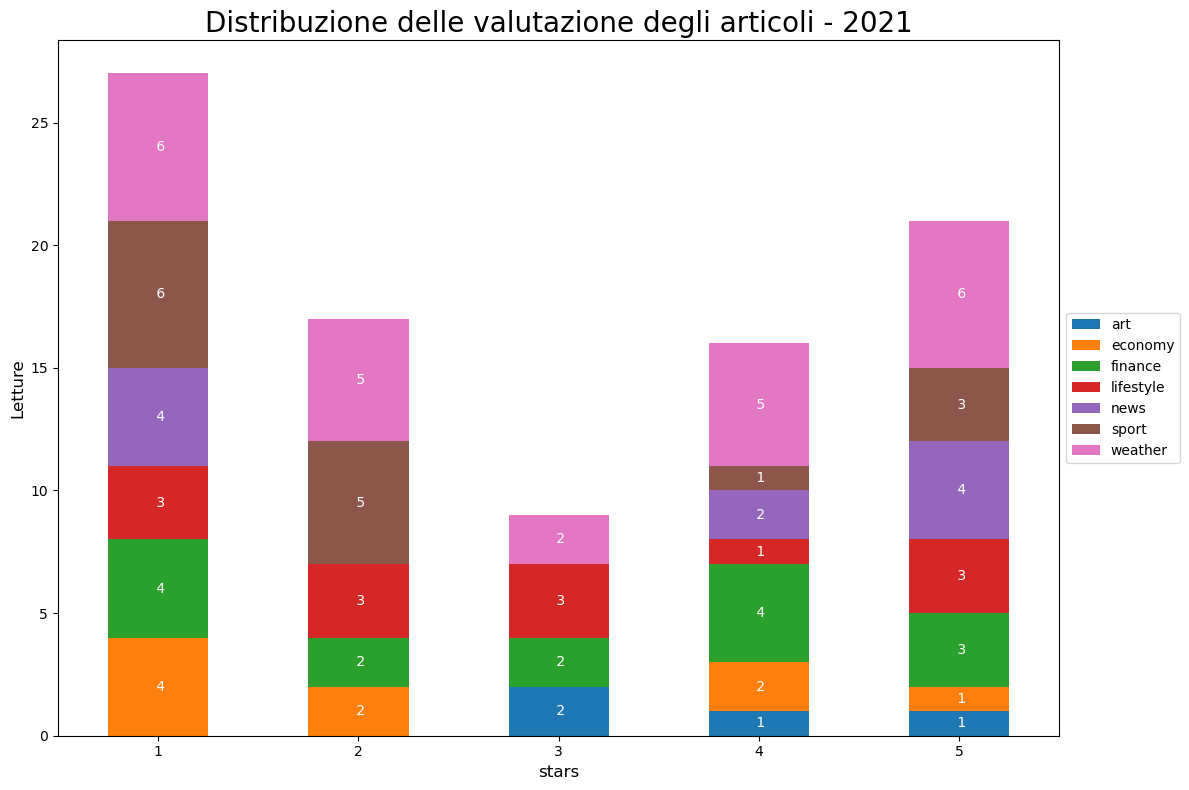

In [549]:
fig, ax = plt.subplots(figsize=(12, 8))
stars_cat.plot(kind='bar', stacked=True, ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.set_title('Distribuzione delle valutazione degli articoli - 2021', fontsize=20)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylabel('Letture', fontsize=12)
plt.xlabel('stars', fontsize=12)

#etichette assolute
for container in ax.containers:
    labels = [f'{h:2.0f}' if h >= 1 else '' for h in container.datavalues]
    ax.bar_label(container, labels=labels, label_type='center', fontsize=10, color='white')


plt.tight_layout()  # set della posizioni nel grafico
plt.savefig('01_reading_avg_stars_cat_perc_2021.png')
plt.show()

Ad una prima indagine sul dataset al 2021, valutando la **distribuzione delle valutazioni** in termini _assoluti_ e _percentuali_, sembrerebbe che
>> _per ogni livello di valutazione_, una **media** del **25-27%** delle letture, per **ogni** `stars` e **complessivamente**, è relativo alla categoria `weather`
>>
>> seguono `finance` e `lifestyle`

Risulta possibile mostrare come alcune categorie mostrino una **maggiore POLARIZZAZIONE** in termini di valutazione dando uno sguardo al grafico percentuale:

>> **`art`** è mediamente concentrata su **valutazioni positive**, o comunque, _sopra la soglia della sufficienza_ **`(3-5)`**
>>
>> **`sport`** ed **`economy`** **non presentano una distribuzione equa**, in quanto le valutazioni sono poste agli estremi (**`1-2`** o **`4-5`**):
>> sono però _fortemente sbilanciate_, anche in termini assoluti, verso **valutazioni negative**
>>
>> per il resto sono equamente distribuite, fatto salvo per **`lifestyle`**, per cui, considerando anche il livello complessivo di numerosità per la
>> valutazione **`3`** (la più "debole"), si presenta la **maggior concentrazione** di valutazioni per la ca(una sorta di POLARIZZAZIONE "CONVERGENTE")ERGENTE")
rgente")


#### Monitoraggio del trend mensile delle **letture degli articoli**
![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

##### Conversione del campo `data`

Al fine di montorare il trend temporale delle letture, decido di estrarre il mese dal campo `read_date`, creando un nuovo campo: `read_month`

In [550]:
Papers_2021['read_month'] = Papers_2021['read_date'].dt.month
Papers_2021

,read_date,user_uuid,category,journalist_id,language,length,country,subscription_date,platform,article_id,stars,read_month
0,2021-02-25,243,art,117,it,short,it,2020-08-24,tablet,5128,3,2
1,2021-07-08,157,weather,111,it,long,it,2020-02-12,tablet,732766,5,7
2,2021-04-17,181,sport,114,en,short,uk,2020-12-09,pc,313130,1,4
3,2021-11-17,138,finance,111,it,short,it,2020-04-06,pc,612403,3,11
4,2021-10-04,94,news,103,it,long,it,2020-03-24,pc,632117,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...
85,2021-01-27,48,weather,114,it,medium,it,2020-10-21,tablet,722526,5,1
86,2021-09-06,19,sport,107,en,short,uk,2020-04-12,tablet,313793,1,9
87,2021-11-22,77,weather,106,it,long,it,2020-06-01,mobile,732297,5,11
88,2021-09-26,224,economy,117,it,short,it,2020-06-04,pc,212474,4,9


#### Indagine introduttiva sul `trend temporale`

Monitoriamo ora il trend annuale a **livello mensile**

In [551]:
# Trend mensile degli articoli letti nel 2021
monthly_article_trend_2021 = Papers_2021.groupby(Papers_2021['read_month'])['article_id'].count()

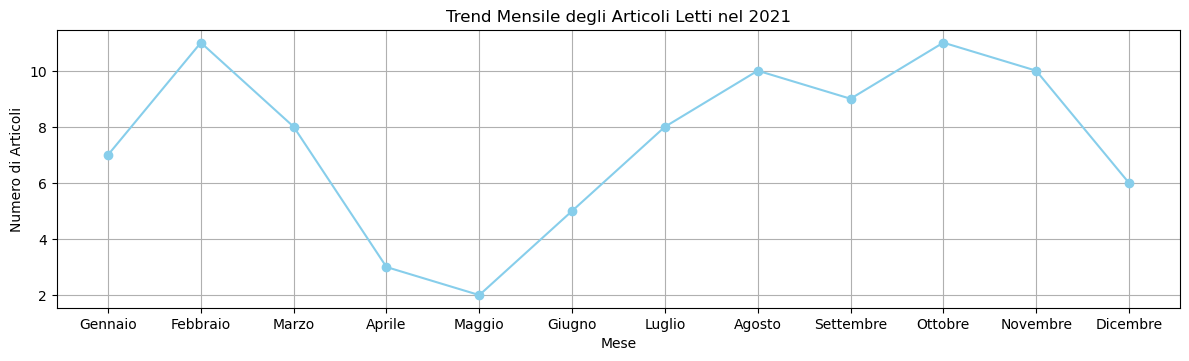

In [552]:
# Definizione dei nomi dei mesi da usare come key 1-12
mesi = ['Gennaio', 'Febbraio', 'Marzo', 'Aprile', 'Maggio', 'Giugno',
         'Luglio', 'Agosto', 'Settembre', 'Ottobre', 'Novembre', 'Dicembre']
# Plot
plt.figure(figsize=(12, 10))

plt.subplot(3, 1, 1)
monthly_article_trend_2021.plot(marker='o', color='skyblue')  # set cromatico della linea
plt.title('Trend Mensile degli Articoli Letti nel 2021')
plt.xlabel('Mese')
plt.ylabel('Numero di Articoli')
plt.xticks(range(1, 13), mesi)  # set delle chiavi mensili nome-numuero sequenziale
plt.grid(True)  # set di una grid per ottimizzar la visualizzazione

plt.tight_layout()  # Aggiusta il layout in modo che le etichette non si sovrappongano
plt.savefig('02_monthly_trend_readings.png')
plt.show()

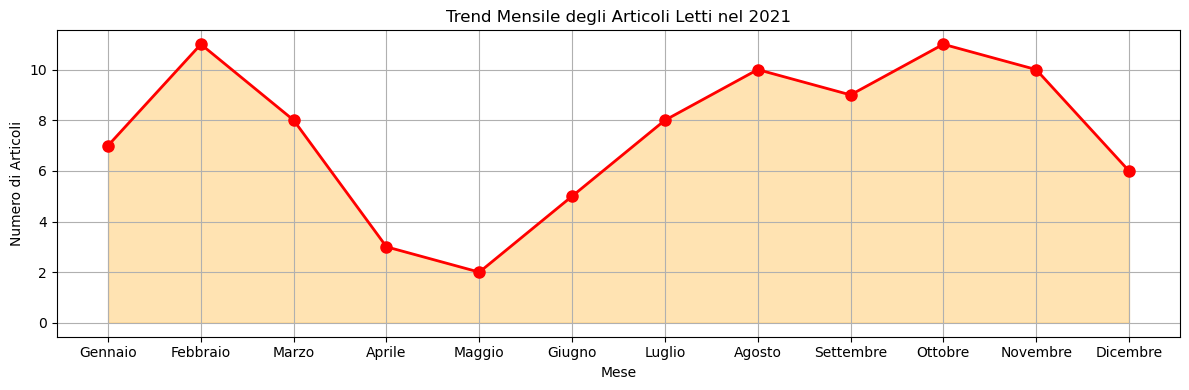

In [553]:
# Calcolo dell'area sottesa alla curva del trend
area = np.trapz(monthly_article_trend_2021, dx=1)

# set di una losta di colori caldi per la trendline con area sottesa
colors = ['orangered', 'orange', 'gold', 'yellow', 'lime', 'green',
          'lightseagreen', 'deepskyblue', 'dodgerblue', 'royalblue', 'darkviolet', 'mediumvioletred']

# Plot
plt.figure(figsize=(12, 4))

# Aggiunta dell'area sottesa alla curva
plt.fill_between(monthly_article_trend_2021.index, monthly_article_trend_2021, color="orange", alpha=0.3)

plt.plot(monthly_article_trend_2021, marker='o', color='red', linewidth=2, markersize=8)
plt.title('Trend Mensile degli Articoli Letti nel 2021')
plt.xlabel('Mese')
plt.ylabel('Numero di Articoli')
plt.xticks(range(1, 13), mesi)
plt.grid(True)

plt.tight_layout()
plt.savefig('02_monthly_trend_readings_area.png')
plt.show()

Da una prima **analisi temporale**,
>> si evince come il `secondo trimestre` dell'anno mostri una _**flessione discendente**_ dell'interesse alla lettura degli articoli.
>>
>> questo trend viene compensato con una _ripresa_ della **DOMANDA DI INFORMAZIONE** nei mesi estivi, perdendo di efficacia nel periodo delle **vacanze natalizie**
>>
Occorre valutar il motivo di questa **flessione stagionale**


#### **Mappatura del trend** con istogramma: `deviazione standard`

A corredo di questa prima indagine, ora mostriamo come i _**mesi del secondo trimestre**_ siano ampiamente **sotto la media annuale**, pur non incidendo in maniera cospicua sul valore medio

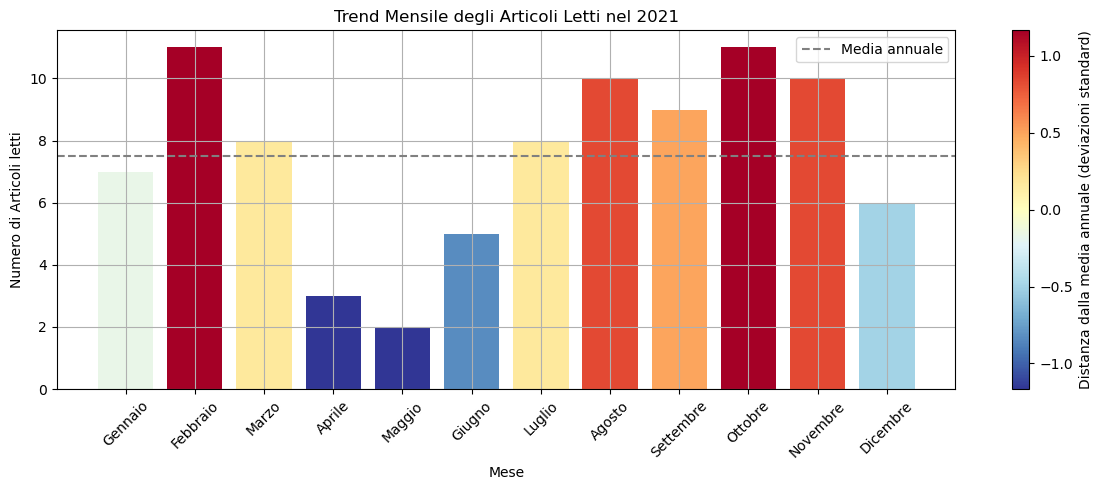

In [554]:
import matplotlib.cm as cm

# Calcolo della media annuale
media_annuale = monthly_article_trend_2021.mean()

# Calcolo della deviazione standard
deviazione_standard = monthly_article_trend_2021.std()

# Calcolo della distanza dalla media in deviazioni standard
distanza_da_media = (monthly_article_trend_2021 - media_annuale) / deviazione_standard

# Utilizzo una mappa di colori divergente
norm = plt.Normalize(-distanza_da_media.max(), distanza_da_media.max())
cmap = cm.RdYlBu_r

# Plot
plt.figure(figsize=(12, 5))

# Grafico a barre
bars = plt.bar(monthly_article_trend_2021.index, monthly_article_trend_2021, color=cmap(norm(distanza_da_media)))

# Linea della media
plt.axhline(media_annuale, color='gray', linestyle='--', label='Media annuale')

plt.title('Trend Mensile degli Articoli Letti nel 2021')
plt.xlabel('Mese')
plt.ylabel('Numero di Articoli letti')
plt.xticks(range(1, 13), mesi, rotation=45)
plt.grid(True)

# barra della legenda per la scala di colori
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=plt.gca(), label='Distanza dalla media annuale (deviazioni standard)')

# Aggiungi legendadi
plt.legend()

plt.tight_layout()
plt.savefig('02_monthly_trend_readings_stddev.png')
plt.show()



Utilizzando un `diagramma a barre` - con **mappatura cromatica graduata** - possiamo mostrare il peso del **periodo di flessione** in relazione alla _**distanza dalla media annuale**_ come
>> _**(MISURA DELLE LETTURE MENSILI - MEDIA ANNUALE) / DEVIAZIONE STANDARD**_
>>
>> sfruttando tale **misura** come indice per la graduazione del plot
>>> all'`aumentare` di tale differenza, si **intensifica** la colorazione;
>>> 
>>> al **collasso verso il limite** di `misura -> media_annuale+/-` , la scala tende ad un coloratura `sbiadita` di giallo/bianco
>>>
>>>> se tale **misura** risulta < `media annuale` la colorazione assume la scala di colori `freddi` (**BLU**)
>>>
>>>> se tale **misura** risulta > `media annuale` la colorazione assume la scala di colori `caldi` (**ROSSO**)
>>>>

Quello che ne emergerebbe potrebbe essere un _**fenomeno ciclico**_ della serie storica ascrivibile alla **`stagionalità`**:
>> si presenta un tasso di lettura **ampiamente sopra la media annuale** a
>>> **febbraio** e a cavallo tra la fine del **periodo estivo** e quello **autunnale**
>>>
>> si mostra un tasso di lettura di articoli ben **sotto la media annuale** tra
>>> **aprile** e **giugno**, in ripresa nei mesi succesivi, evidenzando un tasso di **poco sopra la soglia media** a `luglio` - così come a `marzo`, che mostra un cambio di trend **repentino** in descrescita -.
>>>
>>> il periodo _natalizio_ `dicembre - gennaio` mostra un periodo di stanca inconsueto: il cambio di trend, rispetto a novembre, non è facilmente `predictable`.
>>>
>>> 
Tuttavia, sarebbe interessante analizzare se questo comportamento si ripeta anche negli anni adiacenti, al fine di accertare la natura della serie storica

#### Monitoraggio **trend temporale**: analisi per **`categorie`**
![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

Sulla linea dei presupposti del punto precedente - su cui si basano le nostre fondamenta di analisi - ora possiamo porre la **lente di ingrandimento**
sulla **`distribuzione`** temporale delle letture, in relazione alle **`categorie`** o **`topic`** degli articoli

Costruiamo una sorta di **`Pivot`** delle letture per `mese` e `categoria` e ne leggiamo i potenziali insights attraverso una **`Heat Map`**

In [555]:
import calendar

# Conversione dei numeri dei mesi (variabile INT) in nomi dei mesi
Papers_2021['read_month'] = Papers_2021['read_month'].apply(lambda x: calendar.month_name[int(x)])


# Ordinamento dei mesi secondo convenzione
month_order = list(calendar.month_name)[1:]

# Groupby dei dati per 'read_month' e 'category' e contare le letture
Papers_category = Papers_2021.groupby(['read_month', 'category']).size().unstack()

# Ordinamento delle colonne attraverso reindicizzazione delle righe su base NON alfabetica, ma sulla base della convenzione mensile
Papers_category = Papers_category.reindex(month_order, axis=0)

Papers_category


category,art,economy,finance,lifestyle,news,sport,weather
read_month,,,,,,,
January,NaN,NaN,1.0,2.0,NaN,1.0,3.0
February,3.0,NaN,2.0,1.0,2.0,1.0,2.0
March,1.0,NaN,1.0,2.0,1.0,1.0,2.0
April,NaN,1.0,NaN,1.0,NaN,1.0,NaN
May,NaN,1.0,1.0,NaN,NaN,NaN,NaN
June,NaN,NaN,1.0,NaN,2.0,NaN,2.0
July,NaN,3.0,2.0,NaN,NaN,NaN,3.0
August,NaN,1.0,3.0,NaN,NaN,1.0,5.0
September,NaN,1.0,NaN,2.0,2.0,2.0,2.0


#### Heat Map: numerosità delle **letture** per `category` e `month` 

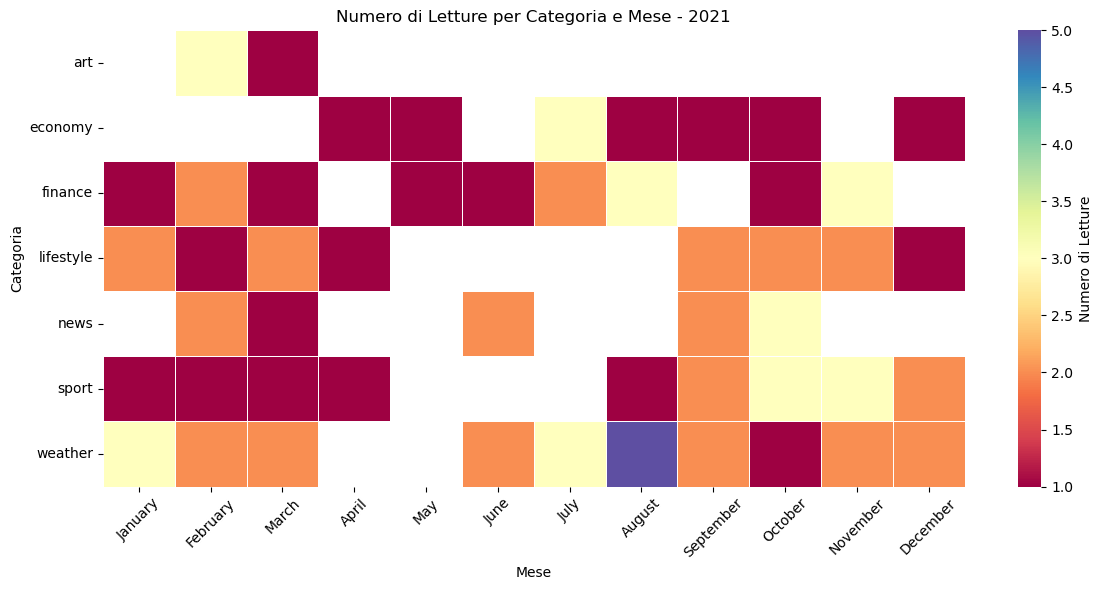

In [556]:
plt.figure(figsize=(12, 6))
heatmap = sns.heatmap(Papers_category.T, annot=False, fmt="d", cmap="Spectral", cbar_kws={'label': 'Numero di Letture'}, linewidths=.5)

# Titolo e label
plt.title('Numero di Letture per Categoria e Mese - 2021')
plt.xlabel('Mese')
plt.ylabel('Categoria')
plt.xticks(rotation=45)
plt.yticks(rotation=0)

plt.tight_layout()
plt.savefig('03_monthly_trend_readings_category.png')
plt.show()

Com'era già stato sottolineato nell'analisi della distribuzione delle letture per `category` e `stars`,
>> La categoria **`weather`** si mostra come la tematica di **maggior interesse** su quasi tutto l'arco temporale, mostrando, tuttavia, una _flessione_ delle letture nel periodo di `secca` di `aprile - maggio` e in `ottobre`
>>
>>> `Gennaio` e `Giugno` sono periodi di discreto interesse, mentre `Agosto` rappresenta il **periodo di picco** per la categoria
>>
>> `economy` e `finance` si mostrano come categorie che compensano, seppur in modo marginale, il periodo di `secca` primaverile, suscitando grande interesse entrambe nel `periodo estivo` - `finance` anche a **novembre** -
>>
>> `lifestyle`,`news` e `sport` si dichiarano come categorie di interesse nel periodo **`autunnale`** - `news` e `lifestyle` anche in inverno, in modo alternato
>>
>> nota di **colore** è rappresentata da `news`, che mostra un comportamento `anomalo` in **giugno** rispetto al trend di periodo
>>
>> **`art`** si conferma come la categoria di **minor interesse**: l'unico periodo in cui sono stati letti articoli al riguardo è quello di `febbraio - marzo`
>>
Per mostrare ulteriormente la **dimensione** di questo fenomeno e gli **`impatti`** o **`contributi`** delle varie categorie, mostriamo il tutto attraverso un **diagramma ad area CATEGORICO**, mostrando i _**trend temporali**_  e i **contributi delle categorie nei vari mesi**

#### Diagaramma ad **`area`**: trend e contributi `category`

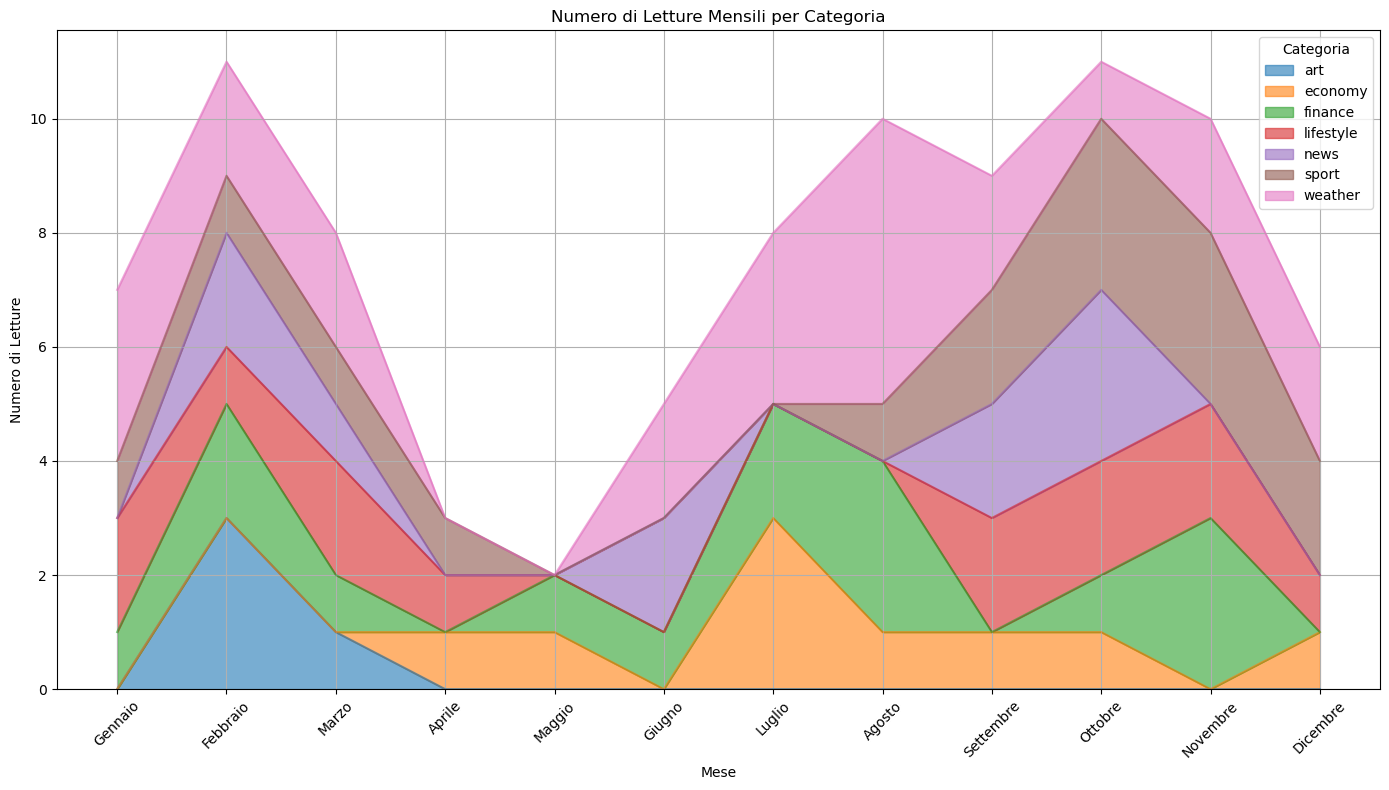

In [557]:
# Raggruppiamo per mese e categoria e contiamo il numero di letture
monthly_category_counts = Papers_2021.groupby(['read_month', 'category']).size().unstack(fill_value=0)

# Ordiniamo l'indice del df secondo l'ordine dei mesi
month_order = list(calendar.month_name)[1:]

monthly_category_counts = monthly_category_counts.reindex(month_order, axis=0)
monthly_category_counts

# Plot
fig, ax = plt.subplots(figsize=(14, 8))

# Linee di trend per ogni categoria
monthly_category_counts.plot(kind='area', stacked=True, ax=ax, alpha=0.6)


ax.set_title('Numero di Letture Mensili per Categoria')
ax.set_xlabel('Mese')
ax.set_ylabel('Numero di Letture')
ax.set_xticks(range(len(mesi)))
ax.set_xticklabels(mesi, rotation=45)
ax.grid(True)

ax.legend(title='Categoria')

plt.tight_layout()
plt.savefig('03_monthly_trend_readings_category_area.png')
plt.show()

Come si è potuto parzialmente evidenziare già con la **Heat Map**, **`weather`** si mostra come la categoria con **`più visibilità`**, salvo nella flessione `primaverile - ottobrina`
>> il contributo nella fase `primaverile` veste i panni di **`sport`**, **`economy`**, **`finance`**, **`lifestyle`**
>>
>> dopo il picco invernale di **`art`**, questa smette di essere di interesse
>
>> **`lifestyle`** si mostra **negli occhi dei lettori** nel periodo di `letargo`: si potrebbe associare al tipico fenomeno della `vita sana` durante l'arco temporale `autunnale - invernale - primaverile`, sinonimo che gli utenti amano seguire ed informarsi su **hint** del vivere bene, per arrivare alla stagione `estiva` nel **pieno della forma**
>
>> **`sport`** mostra un trend simile, suscitando interesse nel periodo tra `luglio-dicembre` e `gennaio-maggio`: coincide con i termini tradizionali della maggior parte delle attività sportive (fatto salvo per meeting **continentali ed intercontinentali** o **sport motoristici**), sia in termini di **pratica agonistica**, sia in termini di **spettatori**
>
>> **`finance`** mostra un interesse medio su tutto l'arco annuale, fatto salvo per `aprile`, `settembre`, `dicembre`
>
>> `news` mostra un behaviour anomalo e discontinuo: i periodi di interesse sono `bimestrali` o `trimestrali`, intervallati da un mese di `stanca`

#### Monitoraggio **trend temporale**: analisi per **`category`** e **valutazione media `stars`**
![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

Seguendo la procedura per mappare i trend di interesse monitorati al punto precedente, ora valutiamo qual è stata la **valutazione media `stars`** mensile per **`category`**

In [558]:
# Trend mensile delle valutazioni medie nel 2021
monthly_avg_stars_2021 = Papers_2021.groupby(['read_month','category'])['stars'].mean().unstack()

# Reordering delle colonne secondo l'ordine dei mesi
monthly_avg_stars_2021 = monthly_avg_stars_2021.reindex(month_order, axis=0)
monthly_avg_stars_2021

category,art,economy,finance,lifestyle,news,sport,weather
read_month,,,,,,,
January,NaN,NaN,5.000000,3.5,NaN,2.000000,3.333333
February,4.0,NaN,1.500000,2.0,4.500000,2.000000,3.500000
March,3.0,NaN,1.000000,2.5,4.000000,2.000000,2.500000
April,NaN,5.000000,NaN,3.0,NaN,1.000000,NaN
May,NaN,2.000000,1.000000,NaN,NaN,NaN,NaN
June,NaN,NaN,5.000000,NaN,3.000000,NaN,3.000000
July,NaN,2.333333,3.500000,NaN,NaN,NaN,5.000000
August,NaN,1.000000,3.333333,NaN,NaN,1.000000,2.600000
September,NaN,4.000000,NaN,3.5,1.000000,1.000000,1.500000


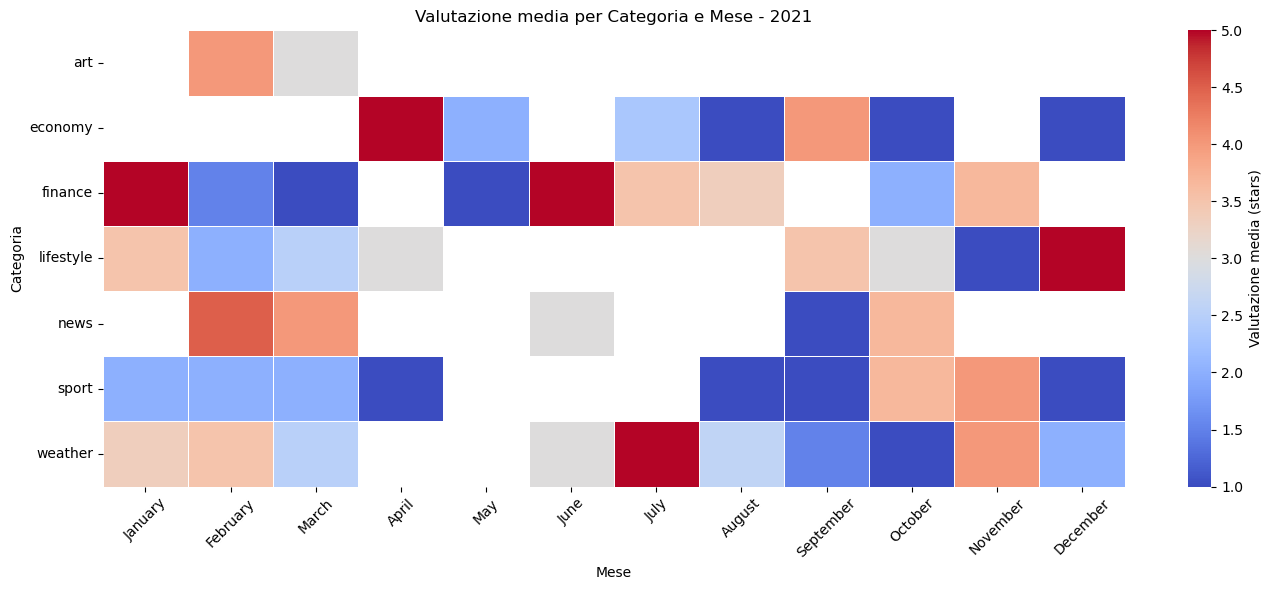

In [559]:
plt.figure(figsize=(14, 6))
heatmap_cat = sns.heatmap(monthly_avg_stars_2021.T, annot=False, fmt="d", cmap="coolwarm", cbar_kws={'label': 'Valutazione media (stars)'}, linewidths=.5)

# Title and label
plt.title('Valutazione media per Categoria e Mese - 2021')
plt.xlabel('Mese')
plt.ylabel('Categoria')
plt.xticks(rotation=45)
plt.yticks(rotation=0)

plt.tight_layout()
plt.savefig('04_monthly_trend_readings_category_stars.png')

plt.show()

Valutando in parallelo la **Heat Map** con quanto precedentemente analizzato,
>> sono **SPORADICHE**, quasi ascrivibili ad `outliers`, le mensilità in cui la **valutazione media `stars`** supera la soglia della _sufficienza_;
>>
>>> solo **`weather`, `economy`, `finance` e `lifestyle`** riescono ad ottenere un **`CALDO ACCOGLIMENTO`** con valutazioni **medie** ampiamente sopra la sufficienza - per quei mesi in cui vengono letti articoli inerenti tali argomenti -
>>
>>> questo fenomeno si manifesta **solo** nel breve termine, per singoli mesi (es. **`weather`** a luglio o **`economy`** ad aprile); non si riesce a mantenere una **valutazione** tale da _**giustificare un interesse continuato nel tempo**_
>>
>> **`weather`, `finance`, `sports`, `news` e `lifestyle`** riescono si a mantenere interessi `bimestrali` degli utenti, ma ottenendo valutazioni di **poco sopra la linea di `galleggiamento = 3`** 
>>
>> **`art`**, per i mesi in cui si manifesta interesse, propone delle **`valutazioni medie`** di poco sopra la sufficienza
>>
Per il resto dei mesi in cui si manifesta interesse, l'accoglimento, in termini di **`valutazione`** è molto **FREDDO**

A giudicare dalla scala cromatica delle due **`Heat Map`**, sembrano esserci delle **convergenze** in termini di `valutazione` e `numero di letture`. Sarebbe interessante monitorare se vi sia qualche **`CORRELAZIONE`** tra la **valutazione media `stars`** e gli **EFFETTI TEMPORALI** di essa sulle **letture `Readings` mensili** _SUCCESSIVE_.

#### Valutazione della **CORRELAZIONE** tra `numero di letture` e `valutazione media`, per `category`
![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

In [560]:
Papers_category

category,art,economy,finance,lifestyle,news,sport,weather
read_month,,,,,,,
January,NaN,NaN,1.0,2.0,NaN,1.0,3.0
February,3.0,NaN,2.0,1.0,2.0,1.0,2.0
March,1.0,NaN,1.0,2.0,1.0,1.0,2.0
April,NaN,1.0,NaN,1.0,NaN,1.0,NaN
May,NaN,1.0,1.0,NaN,NaN,NaN,NaN
June,NaN,NaN,1.0,NaN,2.0,NaN,2.0
July,NaN,3.0,2.0,NaN,NaN,NaN,3.0
August,NaN,1.0,3.0,NaN,NaN,1.0,5.0
September,NaN,1.0,NaN,2.0,2.0,2.0,2.0


In [561]:
Papers_category_stacked = Papers_category.stack().to_frame()
Papers_category_stacked.rename(columns={Papers_category_stacked.columns[0]: "Readings"}, inplace=True)
Papers_category_stacked

Readings
read_month category           
January    finance         1.0
           lifestyle       2.0
           sport           1.0
           weather         3.0
February   art             3.0
           finance         2.0
           lifestyle       1.0
           news            2.0
           sport           1.0
           weather         2.0
March      art             1.0
           finance         1.0
           lifestyle       2.0
           news            1.0
           sport           1.0
           weather         2.0
April      economy         1.0
           lifestyle       1.0
           sport           1.0
May        economy         1.0
           finance         1.0
June       finance         1.0
           news            2.0
           weather         2.0
July       economy         3.0
           finance         2.0
           weather         3.0
August     economy         1.0
           finance         3.0
           sport           1.0
           weather         5.0
September  economy         1.0
           lifestyle       2.0
           news            2.0
           sport           2.0
           weather         2.0
October    economy         1.0
           finance         1.0
           lifestyle       2.0
           news            3.0
           sport           3.0
           weather         1.0
November   finance         3.0
           lifestyle       2.0
           sport           3.0
           weather         2.0
December   economy         1.0
           lifestyle       1.0
           sport           2.0
           weather         2.0

In [562]:
monthly_avg_stars_2021

category,art,economy,finance,lifestyle,news,sport,weather
read_month,,,,,,,
January,NaN,NaN,5.000000,3.5,NaN,2.000000,3.333333
February,4.0,NaN,1.500000,2.0,4.500000,2.000000,3.500000
March,3.0,NaN,1.000000,2.5,4.000000,2.000000,2.500000
April,NaN,5.000000,NaN,3.0,NaN,1.000000,NaN
May,NaN,2.000000,1.000000,NaN,NaN,NaN,NaN
June,NaN,NaN,5.000000,NaN,3.000000,NaN,3.000000
July,NaN,2.333333,3.500000,NaN,NaN,NaN,5.000000
August,NaN,1.000000,3.333333,NaN,NaN,1.000000,2.600000
September,NaN,4.000000,NaN,3.5,1.000000,1.000000,1.500000


In [563]:
monthly_avg_stars_2021_stacked = monthly_avg_stars_2021.stack().to_frame()
monthly_avg_stars_2021_stacked.rename(columns={monthly_avg_stars_2021_stacked.columns[0]: "avg_stars"}, inplace=True)
monthly_avg_stars_2021_stacked

avg_stars
read_month category            
January    finance     5.000000
           lifestyle   3.500000
           sport       2.000000
           weather     3.333333
February   art         4.000000
           finance     1.500000
           lifestyle   2.000000
           news        4.500000
           sport       2.000000
           weather     3.500000
March      art         3.000000
           finance     1.000000
           lifestyle   2.500000
           news        4.000000
           sport       2.000000
           weather     2.500000
April      economy     5.000000
           lifestyle   3.000000
           sport       1.000000
May        economy     2.000000
           finance     1.000000
June       finance     5.000000
           news        3.000000
           weather     3.000000
July       economy     2.333333
           finance     3.500000
           weather     5.000000
August     economy     1.000000
           finance     3.333333
           sport       1.000000
           weather     2.600000
September  economy     4.000000
           lifestyle   3.500000
           news        1.000000
           sport       1.000000
           weather     1.500000
October    economy     1.000000
           finance     2.000000
           lifestyle   3.000000
           news        3.666667
           sport       3.666667
           weather     1.000000
November   finance     3.666667
           lifestyle   1.000000
           sport       4.000000
           weather     4.000000
December   economy     1.000000
           lifestyle   5.000000
           sport       1.000000
           weather     2.000000

In [564]:
corr = pd.merge(Papers_category_stacked, monthly_avg_stars_2021_stacked, how='inner', on = ['read_month','category'])
corr

Readings  avg_stars
read_month category                      
January    finance         1.0   5.000000
           lifestyle       2.0   3.500000
           sport           1.0   2.000000
           weather         3.0   3.333333
February   art             3.0   4.000000
           finance         2.0   1.500000
           lifestyle       1.0   2.000000
           news            2.0   4.500000
           sport           1.0   2.000000
           weather         2.0   3.500000
March      art             1.0   3.000000
           finance         1.0   1.000000
           lifestyle       2.0   2.500000
           news            1.0   4.000000
           sport           1.0   2.000000
           weather         2.0   2.500000
April      economy         1.0   5.000000
           lifestyle       1.0   3.000000
           sport           1.0   1.000000
May        economy         1.0   2.000000
           finance         1.0   1.000000
June       finance         1.0   5.000000
           news            2.0   3.000000
           weather         2.0   3.000000
July       economy         3.0   2.333333
           finance         2.0   3.500000
           weather         3.0   5.000000
August     economy         1.0   1.000000
           finance         3.0   3.333333
           sport           1.0   1.000000
           weather         5.0   2.600000
September  economy         1.0   4.000000
           lifestyle       2.0   3.500000
           news            2.0   1.000000
           sport           2.0   1.000000
           weather         2.0   1.500000
October    economy         1.0   1.000000
           finance         1.0   2.000000
           lifestyle       2.0   3.000000
           news            3.0   3.666667
           sport           3.0   3.666667
           weather         1.0   1.000000
November   finance         3.0   3.666667
           lifestyle       2.0   1.000000
           sport           3.0   4.000000
           weather         2.0   4.000000
December   economy         1.0   1.000000
           lifestyle       1.0   5.000000
           sport           2.0   1.000000
           weather         2.0   2.000000

In [565]:
correlation = corr.select_dtypes(include=['int64','float64','int32']).corr()
correlation

,Readings,avg_stars
Readings,1.000000,0.241793
avg_stars,0.241793,1.000000


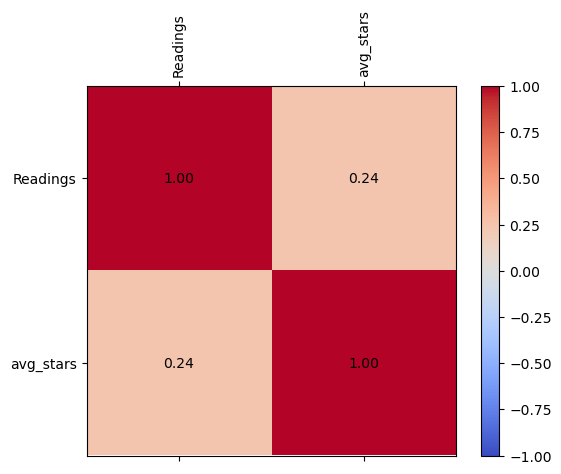

In [566]:
fig, ax = plt.subplots()
cax = ax.matshow(correlation, cmap="coolwarm", vmin=-1, vmax=1)
fig.colorbar(cax)

#annotazioni valori correlazioni
for (i, j), val in np.ndenumerate(correlation):
    ax.text(j, i, f'{val:.2f}', ha='center', va='center', color='black')

plt.xticks(range(len(correlation.columns)), correlation.columns, rotation='vertical');
plt.yticks(range(len(correlation.columns)), correlation.columns); #correlazione positiva medio-elevata in color mattone

plt.savefig('05_Readings_avg_stars_correlation.png', bbox_inches='tight')

Creato un **`dataframe MERGED`** tra `valutazioni` **`stars`** e numero di letture mensili **`Readings`**, sembrerebbe **non** esserci una **CORRELAZIONE** tra le due variabili (0.241793)

La qualità delle notizie in termini di **redazione**, **attinenza**, **sensibilità**, **comunicazione** e - **NON PER ULTIMO** - **contenuto** sono leve che potrebbero sulla **`longevità` o `fedeltà`** dei lettori nel lungo periodo. Ma allo stato attuale, dato il **coefficiente di correlazione stimato**, sembrerebbe non esserci alcuna siginificatività al riguardo.

#### Interazioni tra **`category`** e **valutazione `stars`**

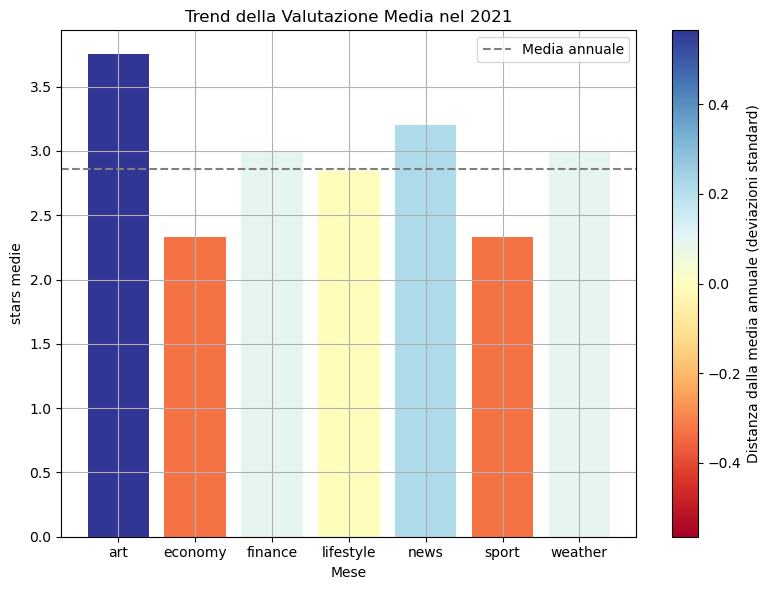

In [567]:
category_avg_stars_2021 = Papers_2021.groupby('category')['stars'].mean()
avg_stars_2021 = Papers_2021.stars.mean()
sd_stars_2021 = Papers_2021.stars.std()

# Calcolo della distanza da media in deviazioni standard
avg_diff = (category_avg_stars_2021 - avg_stars_2021) / sd_stars_2021

# Utilizzo una mappa di colori divergente 
norm = plt.Normalize(-avg_diff.max(), avg_diff.max())
cmap = cm.RdYlBu


# Plot
plt.figure(figsize=(8, 6))

# Grafico a barre
bars = plt.bar(category_avg_stars_2021.index, category_avg_stars_2021, color=cmap(norm(avg_diff)))

# Linea della media
plt.axhline(avg_stars_2021, color='gray', linestyle='--', label='Media annuale')

plt.title('Trend della Valutazione Media nel 2021')
plt.xlabel('Mese')
plt.ylabel('stars medie')
plt.grid(True)

# Aggiunta della barra della legenda per la scala di colori
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=plt.gca(), label='Distanza dalla media annuale (deviazioni standard)')

plt.legend()

plt.tight_layout()
plt.savefig('06_category_avg_stars_interaction.png')
plt.show()

Come già visto per quanto riguarda l'andamento del numero di **`letture`** a livello mensile, utilizzo un `diagramma a barre` - con **mappatura cromatica graduata** - per mostrare il peso delle **valutazioni MEDIE `stars`**, _per **`category`**_, in relazione alla _**distanza dalla media annuale**_ come
>> _**(VALUTAZIONE MEDIA ANNUALE DELLA CATEGORIA - VALUTAZIONE MEDIA ANNUALE COMPLESSIVA) / DEVIAZIONE STANDARD ANNUALE**_
>>
>> sfruttando tale **INDICATORE** come indice per la graduazione del plot
>>> all'`aumentare` di tale differenza, si **intensifica** la colorazione;
>>> 
>>> al **collasso verso il limite** di `INDICATORE -> media_annuale+/-` , la scala tende ad un coloratura `sbiadita` di giallo/bianco
>>>
>>>> se tale **INDICATORE** risulta < `media annuale` la colorazione assume la scala di colori `freddi` (**BLU**)
>>>
>>>> se tale **INDICATORE** risulta > `media annuale` la colorazione assume la scala di colori `caldi` (**ROSSO**)
>>>

Come si evince dal `bar graph` soprastante, solo una categoria ottiene una **valutazione media annua AMPIAMENTE SOPRA LA MEDIA**: **`art`**
>> **`finance`, `lifestyle`, `news`, `weather`** sono le categorie per cui  la **valutazione media annua** è **almeno UGUALE o SUPERIORE alla MEDIA ANNUA**, che comunque risulta **INSUFFICIENTE**
>>
>> **solo `finance`, `news` e `weather`** mostrano una **valutazione media ANNUA di categoria** almeno sufficiente
>>
>> mentre **`lifestyle`, `economy` e `sport`** sono **mediamente INSUFFICIENTI**, dove le **ULTIME DUE** si discostano _negativamente_ in modo ampio rispetto alla media annua.
>>
Nel complesso, le **valutazioni MEDIE ANNUE** ottenute dagli articoli ci danno una indicazione di quanto il mercato dell'**informazione** offra una **proposta di valore** mediamente **SCARSA**. Vi è la possibilità, dunque, di poter _penetrare nel mercato_ con un **carattere distintivo** tale da poter accumulare quote di mercato in modo agevole.

#### **Segmentazione demografica** al 2021
![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

Decido di provare a sondare altri terreni, valutando quale sia la **distribuzione delle letture** in relazione alla **`category`e alle `platform`** utilizzate

In [568]:
platform_category_2021 = Papers_2021.groupby(['platform','category']).size().unstack(fill_value=0)
platform_category_2021

category,art,economy,finance,lifestyle,news,sport,weather
platform,,,,,,,
mobile,1,2,7,3,1,3,8
pc,0,4,4,5,4,8,7
tablet,3,3,4,5,5,4,9


Ora creiamo la **MEDIA di letture DI CATEGORIA** in relazione alla distribuzione attraverso le differenti **`platform`**, **DEFINENDO UN METHOD** riutilizzabile per studi futuri

In [569]:
def avg_calc_method(df):
        
    for cat in list(df.columns):
    # iterando sulle colonne rappresentanti le categorie, creo una variabile "avg_'name_of_cat'":
    # estraggo la STRINGA del nome della VARIABILE contenuta momentaneamente in 'cat' e la
    # uso come SUFFISSO in una nuova variabile - il cui PREFISSO sarà `avg_` - che rappresenterà il VALOR MEDIO di categoria
    # tra le platform disponibili. Questa Stringa verrà usata per inizializzare la nuova colonna nel dataframe IN USO

     ### stringa usata per inizializzare la nuova variabile: `avg_` + `name_of_category` 
            avg_value = "avg_"+str(cat)
    
    # inizializzazione della variabile `avg_`name_of_category``
            df[avg_value] = df[str(cat)].mean()



    ## ESEMPIO LOCALE
    ## ora abbiamo 7 X 2 = 14 colonne: 
    #### 7 rappresentano i valori NOMINALI di letture, per CATEGORIA, attraverso le diverse PLATFORM
    #### 7 rappresentano il valor MEDIO delle letture, per CATEGORIA, in base alla distribuzione NOMINALE tra le platform 

    ###### es. avg_economy = sum(economy)/N_economy (N_platform o N_rows) = (2+4+3)/3 = 9/3 = 3 

    return df

platform_category_2021 = avg_calc_method(platform_category_2021)
platform_category_2021

category,art,economy,finance,lifestyle,news,sport,weather,avg_art,avg_economy,avg_finance,avg_lifestyle,avg_news,avg_sport,avg_weather
platform,,,,,,,,,,,,,,
mobile,1,2,7,3,1,3,8,1.333333,3.0,5.0,4.333333,3.333333,5.0,8.0
pc,0,4,4,5,4,8,7,1.333333,3.0,5.0,4.333333,3.333333,5.0,8.0
tablet,3,3,4,5,5,4,9,1.333333,3.0,5.0,4.333333,3.333333,5.0,8.0


E le **DEVIAZIONI STANDARD** di categoria, creando anche qui un **METHOD**

In [570]:
def std_calc_method(df):

    for cat in list(df.columns):
    # iterando sulle colonne delle categorie, creo una variabile "std_'name_of_cat'":
    # estraggo la STRINGA del nome della VARIABILE contenuta momentaneamente in 'cat'
    # CONTROLLO CHE TALE VARIABILE NON SIA UNA MEDIA e la
    # uso come SUFFISSO in una nuova variabile - il cui PREFISSO sarà `std_` - che rappresenterà la DEVIAZIONE STANDARD di categoria
    # tra le platform disponibili. Questa Stringa verrà usata per inizializzare la nuova colonna nel dataframe IN USO

    #controllo che la variabile nel ciclo NON SIA UNA MEDIA
        if cat.startswith("avg_")==0:  
        ### stringa usata per inizializzare la nuova variabile: `std_` + `name_of_category` 
            std_value = "std_"+str(cat)
        
        # inizializzazione della variabile `std_`name_of_category`` 
            df[std_value] = df[str(cat)].std()

    ##ESEMPIO LOCALE
    ## ora abbiamo 7 X 3 = 21 colonne: 
    #### 7 rappresentano i valori NOMINALI di letture, per CATEGORIA, attraverso le diverse PLATFORM
    #### 7 rappresentano il valor MEDIO delle letture, per CATEGORIA, in base alla distribuzione NOMINALE tra le platform 
    #### 7 rappresentano la DEVIAZIONE STANDARD delle letture, per CATEGORIA

    return df

platform_category_2021 = std_calc_method(platform_category_2021)
platform_category_2021


category,art,economy,finance,lifestyle,news,sport,weather,avg_art,avg_economy,avg_finance,...,avg_news,avg_sport,avg_weather,std_art,std_economy,std_finance,std_lifestyle,std_news,std_sport,std_weather
platform,,,,,,,,,,,,,,,,,,,,,
mobile,1,2,7,3,1,3,8,1.333333,3.0,5.0,...,3.333333,5.0,8.0,1.527525,1.0,1.732051,1.154701,2.081666,2.645751,1.0
pc,0,4,4,5,4,8,7,1.333333,3.0,5.0,...,3.333333,5.0,8.0,1.527525,1.0,1.732051,1.154701,2.081666,2.645751,1.0
tablet,3,3,4,5,5,4,9,1.333333,3.0,5.0,...,3.333333,5.0,8.0,1.527525,1.0,1.732051,1.154701,2.081666,2.645751,1.0


Ora creiamo le variabili di **distanza rispetto alla MEDIA DI CATEGORIA**, creando, ancora una volta, un **METHOD**

In [571]:
def norm_calc_method(df):

    for cat in list(df.columns):
     # iterando sulle colonne delle categorie, creo una variabile "norm_value_'name_of_cat'":
    # estraggo la STRINGA del nome della VARIABILE contenuta momentaneamente in 'cat'
    # CONTROLLO CHE TALE VARIABILE NON SIA UNA MEDIA o UNA DEVIAZIONE STANDARD e la
    # uso come suffisso in una nuova variabile - che inizia con `norm_value_` - che rappresenterà la DIFFERENZA DALLA MEDIA di categoria, basata
    # sulla DEVIAZIONE STANDARD, tra le platform disponibili. Questa Stringa verrà usata per inizializzare la nuova colonna nel dataframe
    # IN USO
        if cat.startswith("avg_")==0 | cat.startswith("std_")==0:

        #stringa che permette di individuare a quale colonna riferirsi in termini di MEDIA (es. se `cat` == `art`, questa sarà `avg_art`)
        ## verrà usata per accedere alla variabile presente nel dataset, utile a fare il calcolo della variabile `norm_value_`
            avg_var = "avg_"+str(cat)
        
        #stringa che permette di individuare a quale colonna riferirsi in termini di DEVIAZIONE STANDARD (es. se `cat` == `art`, questa sarà `std_art`)
        ## verrà usata per accedere alla variabile presente nel dataset, utile a fare il calcolo della variabile `norm_value_`
            std_var = "std_"+str(cat)
        
        ### stringa usata per inizializzare la nuova variabile: `norm_value` + `name_of_category`
            norm_value = "norm_value_"+str(cat)
        
        # inizializzazione della variabile `norm_value_`name_of_category``
            df[norm_value] = (df[cat] - df[avg_var])/df[std_var]

    ###ESMEPIO LOCALE
    ## ora abbiamo 7 X 4 = 28 colonne: 
    #### 7 rappresentano i valori NOMINALI di letture, per CATEGORIA, attraverso le diverse PLATFORM
    #### 7 rappresentano il valor MEDIO delle letture, per CATEGORIA, in base alla distribuzione NOMINALE tra le platform 
    #### 7 rappresentano la DEVIAZIONE STANDARD delle letture, per CATEGORIA
    #### 7 rappresentano i valori NORMALIZZATI come DIFFERENZA RISPETTO ALLA MEDIA DI CATEGORIA, pesata sulla DEVIAZIONE STANDARD, delle letture,
    #### per CATEGORIA

    return df

platform_category_2021 = norm_calc_method(platform_category_2021)
platform_category_2021

category,art,economy,finance,lifestyle,news,sport,weather,avg_art,avg_economy,avg_finance,...,std_news,std_sport,std_weather,norm_value_art,norm_value_economy,norm_value_finance,norm_value_lifestyle,norm_value_news,norm_value_sport,norm_value_weather
platform,,,,,,,,,,,,,,,,,,,,,
mobile,1,2,7,3,1,3,8,1.333333,3.0,5.0,...,2.081666,2.645751,1.0,-0.218218,-1.0,1.154701,-1.154701,-1.120897,-0.755929,0.0
pc,0,4,4,5,4,8,7,1.333333,3.0,5.0,...,2.081666,2.645751,1.0,-0.872872,1.0,-0.577350,0.577350,0.320256,1.133893,-1.0
tablet,3,3,4,5,5,4,9,1.333333,3.0,5.0,...,2.081666,2.645751,1.0,1.091089,0.0,-0.577350,0.577350,0.800641,-0.377964,1.0


Ora **estraiamo le sole variabili NORMALIZZATE** e le **rinominiamo ai fini grafici**, definendo un **METHOD**

In [572]:
def norm_extraction(original_df):

    #estraggo una lista delle colonne del dataframe IN USO
    varlist = list(original_df.columns)
    varlist

    #tengo le varibili normalizzate `norm_value_`
    newlist = [x for x in varlist if x.startswith('norm_value_')]

    ##utilizzo questa nuova lista per selezionare le variabili che mi serviranno per la HEAT MAP
    new_df = original_df[newlist]
    return new_df

norm_platform_category_2021 = norm_extraction(platform_category_2021)
norm_platform_category_2021

category,norm_value_art,norm_value_economy,norm_value_finance,norm_value_lifestyle,norm_value_news,norm_value_sport,norm_value_weather
platform,,,,,,,
mobile,-0.218218,-1.0,1.154701,-1.154701,-1.120897,-0.755929,0.0
pc,-0.872872,1.0,-0.577350,0.577350,0.320256,1.133893,-1.0
tablet,1.091089,0.0,-0.577350,0.577350,0.800641,-0.377964,1.0


Rinominiamo le variabili, definendo un **METHOD**

In [573]:
def ren_var(df):

## RINOMINO LE VARIABILI rimuovendo `norm_value_`

    for var in list(df):
        if str(var).startswith('norm_value_'):
        # valutata la natura della variabile che 'var' assume nel ciclo (inizi con `norm_value_`)
        #estraiamo il nome originale, glissando i primi 11 caratteri (index 0-10), ovvero 'norm_value_'
            new_name = str(var[11:])
        #ora associamo l'estrazione, che equivale al nome ORIGINALE della variabile `art, economoy, weather etc.` 
            df.rename(columns={var: new_name}, inplace=True)

    return df

norm_platform_category_2021 = ren_var(norm_platform_category_2021)
norm_platform_category_2021

C:\Users\Matteo Biasio\AppData\Local\Temp\ipykernel_14548\3118597139.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={var: new_name}, inplace=True)


category,art,economy,finance,lifestyle,news,sport,weather
platform,,,,,,,
mobile,-0.218218,-1.0,1.154701,-1.154701,-1.120897,-0.755929,0.0
pc,-0.872872,1.0,-0.577350,0.577350,0.320256,1.133893,-1.0
tablet,1.091089,0.0,-0.577350,0.577350,0.800641,-0.377964,1.0


Quello che ne risulta è la costruzione di un **piccolo dataframe riassuntivo**, utile ad una **`Heat Map`** per **`platform` e `category`**, ma con **VALORI NORMALIZZATI**:
>> la scelta è data dal fatto che l'**utilizzo di valori assoluti** avrebbe inevitabilmente sovrastimato l'effetto **DIMENSIONE** per alcune **categorie** (es. **`weather`**, la categoria, come sappiamo, più interessante in base alle letture);
>>
>> decidendo di utilizzare **VALORI NORMALIZZATI** come **differenza rispetto alla MEDIA di CATEGORIA, pesata per la DEVIAZIONE STANDARD di CATEGORIA** possiamo **ridurre gli EFFETTI DIMENSIONALI PER LE CATEGORIE** e apprendere con più **chiarezza**, per **ogni categoria**, quale sia la **`piattaforma PREFERITA`**

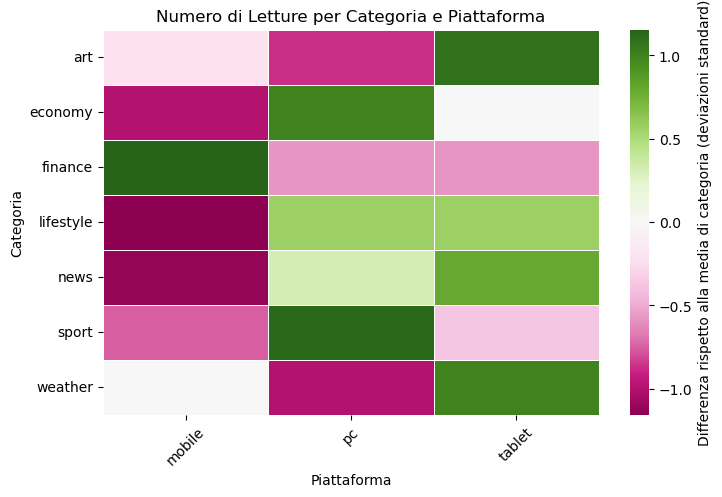

In [574]:
plt.figure(figsize=((8, 5)))
heatmap = sns.heatmap(norm_platform_category_2021.T, annot=False, fmt="d", cmap="PiYG", cbar_kws={'label': 'Differenza rispetto alla media di categoria (deviazioni standard)'}, linewidths=.5)

# titolo e etichette
plt.title('Numero di Letture per Categoria e Piattaforma')
plt.xlabel('Piattaforma')
plt.ylabel('Categoria')
plt.xticks(rotation=45)
plt.yticks(rotation=0)

plt.savefig('07_category_platform_norm.png')
plt.show()

Ora possiamo evidenziare in modo abbastanza chiaro, quali protrebbero essere le **PIATTAFORME PREFERITE** in funzione della **CATEGORIA ESAMINATA**
>> per **`weather`**, insieme ad **`art`** si mostra come i lettori siano indirizzati, mediamente, alla lettura dei relativi articoli attraverso l'utilizzo del **tablet**:
>>> la **differenza, PESATA per STD, positiva rispetto alla media di categoria** (sebbene siano impercettibili a livello nominale (es. valori 8-7-9 per `weather`)) ci fa suppore che la scelta sia dovuta al fatto che gli articoli inerenti a queste due categorie richiedano un _**device**_ dalle dimensioni comparabili a quelle di un **`PC`**:
>>>> un **`tablet`** ha il **vantaggio funzionale** di poter essere facilmente accessibile anche durante trasferte, ed è possibile tenerlo in borsa;
>>>>
>>>> in più trattasi di categorie il cui **impatto grafico** ha una sua rilevanza: **`art`** potrebbe richiedere di visualizzare **immagini** ad _alta risoluzione_ di opere d'arte o di installazioni avveniristiche di qualche designer. Risulta il giusto compromesso tra **`mobile`** (**portabile** in modo agevole, ma **con uno schermo**, la cui dimensione potrebbe non rendere giustizia - così come non rendere agevole la consultazione - alle opere illustrate negli articoli) e **`pc`** (schermo **di grandi dimensioni** ma con un **handling** e una **fruibilità** non sempre _immediata_)
>>>>
>>>> allo stesso modo **`weather`** richiede, per gli utenti più consapevoli e informati, di consultare **dati e mappe cartografiche con differenti layer**, ad esempio sui **carotaggi** che aiutano a monitorare il meteo tra le diverse _ere geologiche_, la cui **complessità e dimensione** richiede l'ausilio di uno strumento il cui display sia di ratio appropriata, con lo stesso compromesso visto per **`art`**
>>
>> **`economy` e `sport`** mostrano una differenza positiva, rispetto alla media di categoria, per quanto riguarda la consultazione su **`pc`**:
>>> le tematiche **economiche**, soprattutto quando si tratta di consultazione di, ad esempio, articoli inerenti la **valutazioe di politiche pubbliche con strumenti econometrici**, richiedono l'ausilio di un device ad **alta risoluzione** (per visualizzare meglio tabelle riassuntive di **test di convergenza** o **scatter plot** di **regressioni** e  modelli probabilistici come **probit o multiprobit**), ma anche un **contesto** relativamente _adeguato_, _silenzioso_, come studi e/o uffici, trattandosi di tematiche altamente complesse. L'ausilio del PC risulta relativamente motivato.
>>>
>>> articoli di **`sport`** potrebbero avere una più agevole lettura su grandi schermi, come il **`pc`**, a riprodurre le dimensioni di una **testata giornalistica cartacea**, riconducendosi ad una sorta di **effetto nostalgia** per la carta stampata.
>>
>> **`lifestyle` e `news`** mostrano un comportamento simile come predilezione alla consultazione attraverso **`pc` e `tablet`**:
>>> la differenza in termini positivi, rispetto alla media di categoria, potrebbe essere motivata dal fatto che articoli di questo genere potrebbe essere consultati in **fasi giornaliere non troppo stressanti** - magari durante i pasti o nel tempo libero - dunque non c'è la necessità di una preferenza specifica in termini di **device**
>>
>> **`finance`** si mostra come una sorta di **_anticonformista_** nell'economia di questa **Heat Map**: si mostrerebbe una predilezione per la consultazione atraverso **`mobile`**: la motivazione è abbastanza comprensibile, in quanto potrebbe trattarsi di articoli per cui si richiede una consultazione **immediata**, soprattutto se si ha a che fare, come mestiere, con i **mercati finanziari e mobiliari, le quotazioni in borsa, titoli azionari e/o trading di criptovalute**
>>
 
Possiamo ora approfondire lo studio, concentrandosi sul **tasso di attenzione** dei lettori, in termini di preferenze di **LUNGHEZZA** dell'articolo, USANDO LO **STESSO PRINCIPIO DI RAPPRESENTAZIONE DI QUESTA ANALISI**

#### **LUNGHEZZA media** degli articoli, per **`category`**
![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

In [575]:
# Lunghezza media degli articoli per categoria nel 2021
category_avg_length_2021 = Papers_2021.groupby(['length','category']).size().unstack(fill_value=0)
category_avg_length_2021

category,art,economy,finance,lifestyle,news,sport,weather
length,,,,,,,
long,2,2,5,8,5,6,12
medium,0,2,4,2,2,4,4
short,2,5,6,3,3,5,8


Ora creiamo la **MEDIA di letture DI CATEGORIA** in relazione alla distribuzione attraverso le differenti **`length`**, sfruttando il **METHOD** creato precedentemente

In [576]:
category_avg_length_2021 = avg_calc_method(category_avg_length_2021)
category_avg_length_2021

category,art,economy,finance,lifestyle,news,sport,weather,avg_art,avg_economy,avg_finance,avg_lifestyle,avg_news,avg_sport,avg_weather
length,,,,,,,,,,,,,,
long,2,2,5,8,5,6,12,1.333333,3.0,5.0,4.333333,3.333333,5.0,8.0
medium,0,2,4,2,2,4,4,1.333333,3.0,5.0,4.333333,3.333333,5.0,8.0
short,2,5,6,3,3,5,8,1.333333,3.0,5.0,4.333333,3.333333,5.0,8.0


Creiamo ora la **DEVIAZIONE STANDARD**, sfruttando il **METHOD** creato in precedenza

In [577]:
category_avg_length_2021 = std_calc_method(category_avg_length_2021)
category_avg_length_2021

category,art,economy,finance,lifestyle,news,sport,weather,avg_art,avg_economy,avg_finance,...,avg_news,avg_sport,avg_weather,std_art,std_economy,std_finance,std_lifestyle,std_news,std_sport,std_weather
length,,,,,,,,,,,,,,,,,,,,,
long,2,2,5,8,5,6,12,1.333333,3.0,5.0,...,3.333333,5.0,8.0,1.154701,1.732051,1.0,3.21455,1.527525,1.0,4.0
medium,0,2,4,2,2,4,4,1.333333,3.0,5.0,...,3.333333,5.0,8.0,1.154701,1.732051,1.0,3.21455,1.527525,1.0,4.0
short,2,5,6,3,3,5,8,1.333333,3.0,5.0,...,3.333333,5.0,8.0,1.154701,1.732051,1.0,3.21455,1.527525,1.0,4.0


Calcoliamo ora il valore **NORMALIZZATO** delle **DIFFERENZE RISPETTO ALLA MEDIA DI CATEGORIA** pesate per **SD**, usando il **METHOD**

In [578]:
category_avg_length_2021 = norm_calc_method(category_avg_length_2021)
category_avg_length_2021

category,art,economy,finance,lifestyle,news,sport,weather,avg_art,avg_economy,avg_finance,...,std_news,std_sport,std_weather,norm_value_art,norm_value_economy,norm_value_finance,norm_value_lifestyle,norm_value_news,norm_value_sport,norm_value_weather
length,,,,,,,,,,,,,,,,,,,,,
long,2,2,5,8,5,6,12,1.333333,3.0,5.0,...,1.527525,1.0,4.0,0.577350,-0.577350,0.0,1.140647,1.091089,1.0,1.0
medium,0,2,4,2,2,4,4,1.333333,3.0,5.0,...,1.527525,1.0,4.0,-1.154701,-0.577350,-1.0,-0.725866,-0.872872,-1.0,-1.0
short,2,5,6,3,3,5,8,1.333333,3.0,5.0,...,1.527525,1.0,4.0,0.577350,1.154701,1.0,-0.414781,-0.218218,0.0,0.0


Estraiamo **SOLO LE VARIABILI NORMALI** che ci serviranno, con il **METHOD**:

In [579]:
norm_cat_avg_length_2021 = norm_extraction(category_avg_length_2021)
norm_cat_avg_length_2021

category,norm_value_art,norm_value_economy,norm_value_finance,norm_value_lifestyle,norm_value_news,norm_value_sport,norm_value_weather
length,,,,,,,
long,0.577350,-0.577350,0.0,1.140647,1.091089,1.0,1.0
medium,-1.154701,-0.577350,-1.0,-0.725866,-0.872872,-1.0,-1.0
short,0.577350,1.154701,1.0,-0.414781,-0.218218,0.0,0.0


Rinominaimo le **variabili estratte**, con il **METHOD**

In [580]:
norm_cat_avg_length_2021 = ren_var(norm_cat_avg_length_2021)
norm_cat_avg_length_2021

C:\Users\Matteo Biasio\AppData\Local\Temp\ipykernel_14548\3118597139.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={var: new_name}, inplace=True)


category,art,economy,finance,lifestyle,news,sport,weather
length,,,,,,,
long,0.577350,-0.577350,0.0,1.140647,1.091089,1.0,1.0
medium,-1.154701,-0.577350,-1.0,-0.725866,-0.872872,-1.0,-1.0
short,0.577350,1.154701,1.0,-0.414781,-0.218218,0.0,0.0


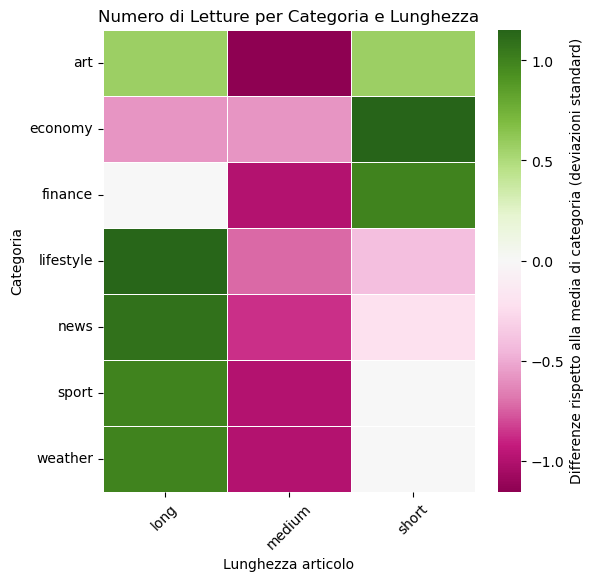

In [581]:
plt.figure(figsize=(6, 6))
heatmap = sns.heatmap(norm_cat_avg_length_2021.T, annot=False, fmt="d", cmap="PiYG", cbar_kws={'label': 'Differenze rispetto alla media di categoria (deviazioni standard)'}, linewidths=.5)


plt.title('Numero di Letture per Categoria e Lunghezza')
plt.xlabel('Lunghezza articolo')
plt.ylabel('Categoria')
plt.xticks(rotation=45)
plt.yticks(rotation=0)

plt.savefig('08_category_length_norm.png')
plt.show()

La **Heat Map** mostra dei comportamenti dei lettori discretamente evidenziabili: si presenta, per la grande maggioranza, un fenomeno di **POLARISMO** nelle scelte della **lunghezza `length`** degli articoli (o **`short`** o **`long`**).
>> **`lifestyle`, `news`, `sport`, `weather`** mostrano come vi sia una preferenza, in termini di **_differenza positiva_ rispetto alla media di categoria, pesata per SD di categoria**, alla lettura di articoli **di lunga redazione `long`**; vi è invece una **media preferenza** per le letture con un numero ridotto di caratteri **`short`**.
>>> il fenomeno potrebbe essere motivato dal fatto che, per queste categorie, si voglia andare più nel **dettaglio**, mostrando una volontà ad approfondire specifiche tematiche, in quanto possono influenzare anche le decisioni del quotidiano che possono avere risvolti nel medio-lungo termine, come nel caso di **`lifestyle`, `news` o `weather`**
>>
>> nel caso di **`economy` e `finance`** il fenomeno è l'opposto: si mostra una predilezione sopra la media per le letture **`short`**, mentre nella media per le **`long`** nel solo caso di **`finance`**:
>>> la scelta potrebbe essere motivata dal fatto che, benchè si tratti di argomenti che hanno risvolti sulla collettività, vi sia una predilezione alla **_sintesi_**, in modo tale da poter prendere decisioni in maniera si consapevole, ma anche rapida, attraverso NUMERI, come avviene spesso nei **mercati mobiliari o in borsa** (cosa leggermente diversa nelle **scelte politiche-economiche collettive**).

#### Distribuzione **`language` - `country`**

In [582]:
# Distribuzione linguistica nel 2021
lang_country_2021 = Papers_2021.groupby(['language','country']).size().unstack(fill_value=0)
lang_country_2021

country,fr,it,uk
language,,,
en,0,0,28
fr,15,0,0
it,0,47,0


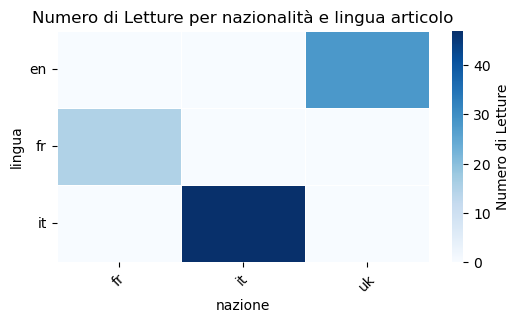

In [583]:
plt.figure(figsize=(6, 3))
heatmap = sns.heatmap(lang_country_2021, annot=False, fmt="d", cmap="Blues", cbar_kws={'label': 'Numero di Letture'}, linewidths=.5)

# Aggiungere titolo e etichette
plt.title('Numero di Letture per nazionalità e lingua articolo')
plt.xlabel('nazione')
plt.ylabel('lingua')
plt.xticks(rotation=45)
plt.yticks(rotation=0)

plt.savefig('09_language_country.png')
plt.show()

Come è chiaramente evidenziabile, **non esiste alcuna DEVIAZIONE LINGUISTICA** tra la **lingua in cui è redatto l'articolo `language`** e la nazionalità del lettore **`country`**: sembrerebbe dunque che vi sia una tendenza alla **_soddisfazione informativa_** attraverso l'ausilio di _stampa nazionale_, che non richieda invece di assumere informazioni attraverso stampa estera, condizione abbastanza limitante.

A questo proposito vorrei muovere una **CRITICA** nei confronti di un contesto come questo: è vero che tendenzialmente siamo propensi a **guardare il nostro orticello**, ma un occhio al giardino del vicino sicuramente accrescerebbe il nostro bagaglio culturale. Andrebbe dunque valutata la conoscenza di altre lingue dei lettori (che, nel caso **italiano**, mostra dei limiti nella conoscenza dell'**inglese**).

La conoscenza di altre lingue inciderebbe sul **progresso culturale delle popolazioni nazionali**: sarebbe un forte driver a motivare la scelta di **altri autori**, che redigono in **altre lingue**, considerando la valutazione media degli articoli è piuttosto **scarsa**.

Sembrerebbe quasi che i lettori siano contenti di questa situazione, che non fa altro che mettere la controparte, gli **editori**, nelle condizioni di non "evolversi". Ma, in realtà, la scelta di altre lingue e, potenzialmente, di articoli più interessanti potrebbe avere **conseguenze** a doppia valenza:
>> **potrebbe accrescere il bagaglio conoscitivo dei lettori**, leggendo anche in altre lingue;
>> **motiverebbe i giornalisti** a competere in termini di qualità e a produrre contenuti di livello, innalzando l'asticella del settore in termini di **contenuti offerti**

Come sempre, le **responsabilità di un fenomeno** stanno **nel mezzo**. Occorre un compromesso delle parti.

#### Gusti per Nazione: **`category`**
![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

In [584]:
# Gusti per nazione nel 2021
cat_nat_2021 = Papers_2021.groupby(['category','country']).size().unstack(fill_value=0)
cat_nat_2021

country,fr,it,uk
category,,,
art,0,3,1
economy,2,4,3
finance,0,10,5
lifestyle,1,7,5
news,2,6,2
sport,3,4,8
weather,7,13,4


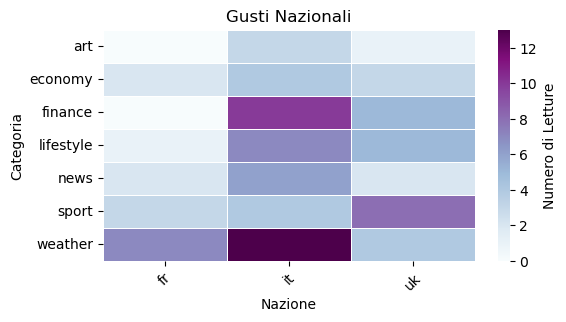

In [585]:
plt.figure(figsize=(6, 3))
heatmap = sns.heatmap(cat_nat_2021, annot=False, fmt="d", cmap="BuPu", cbar_kws={'label': 'Numero di Letture'}, linewidths=.5)

# titolo e etichette
plt.title('Gusti Nazionali')
plt.xlabel('Nazione')
plt.ylabel('Categoria')
plt.xticks(rotation=45)
plt.yticks(rotation=0)

plt.savefig('10_country_category.png')
plt.show()

Si evince come
>> gli **`italiani`** prediligano letture inerenti le categorie **`weather`**, **`finance`** e **`lifestyle`**
>>> sono tematiche strettamente legate al quotidiano, ma che possono avere risvolti anche nel medio-lungo termine:
>>>> l'Italia negli ultimi anni, come nel resto del mondo, ha subito movimenti repentini in termini di **cambiamento climatico**; si potrebbe dunque pensare ad una scelta collettiva di assumere **maggiore consapevolezza** riguardo a quale sia la situazione attuale del nostro ambiente e il nostro agire abbia influito su tale cambiamento.
>>>>
>>>> la scelta **`lifestyle`** si potrebbe motivare attraverso i **fenomeni sociali** occorsi durante il periodo di _clausura forzata_ del Covid-19: le persone, abituate ad intensi turni di lavoro, ad una vista frenetica, sembra abbiano scoperto e riscoperto il piacere di **dedicarsi al proprio IO**, prediligendo scelte indirizzate al **benessere individuale**, dalle scelte di acquisti al **supermercato**, al seguire una **vita sana**, alla scelta di affidarsi ad un **terapeuta**, come uno **_psicologo_**. Sotto questo ultimo punto i decisori collettivi nazionali si sono movimentati, fornendo "Bonus" per le famiglie con reddito inferiore ad una specifica soglia, ma non è ancora abbastanza.
>>>>
>>>> **`finance`** si motiva con una crescente consapevolezza, del popolo italiano, dello **stato dell'arte del sistema finanziario nazionale**, sempre più al **_collasso_**. Questo potrebbe incidere sulle scelte individuali in termini di accesso ad informazioni che rendano scelte del quotidiano più ponderate e supportate da dati.
>>
>> gli **`inglesi`** sono principalmente interessati a tematiche di  **`sport`**,**`finance`** e **`lifestyle`**
>>>> lo **`sport`** lo si potrebbe motivare con un crescente interesse durante la continua lotta, in diversi sport, con la rappresentanza **`italiana`**, durante le Olimpiadi di Tokyo 2021, gli Europei di calcio e durante altri meeting occorsi in quel periodo
>>>>
>>>> **`finance`** è un tema, nel mondo anglosassone, ormai ricorrente
>>>> per **`lifestyle`** potrebbe essere fatti un discorso simile a quello italiano, anche se le procedure di isolamento forzato erano ben diverse dal caso nostrano
>>
>> i **`francesi`** sono tendenzialmente convergenti verso articoli inerenti **`weather`**

#### Trend temporale dei **Gusti**

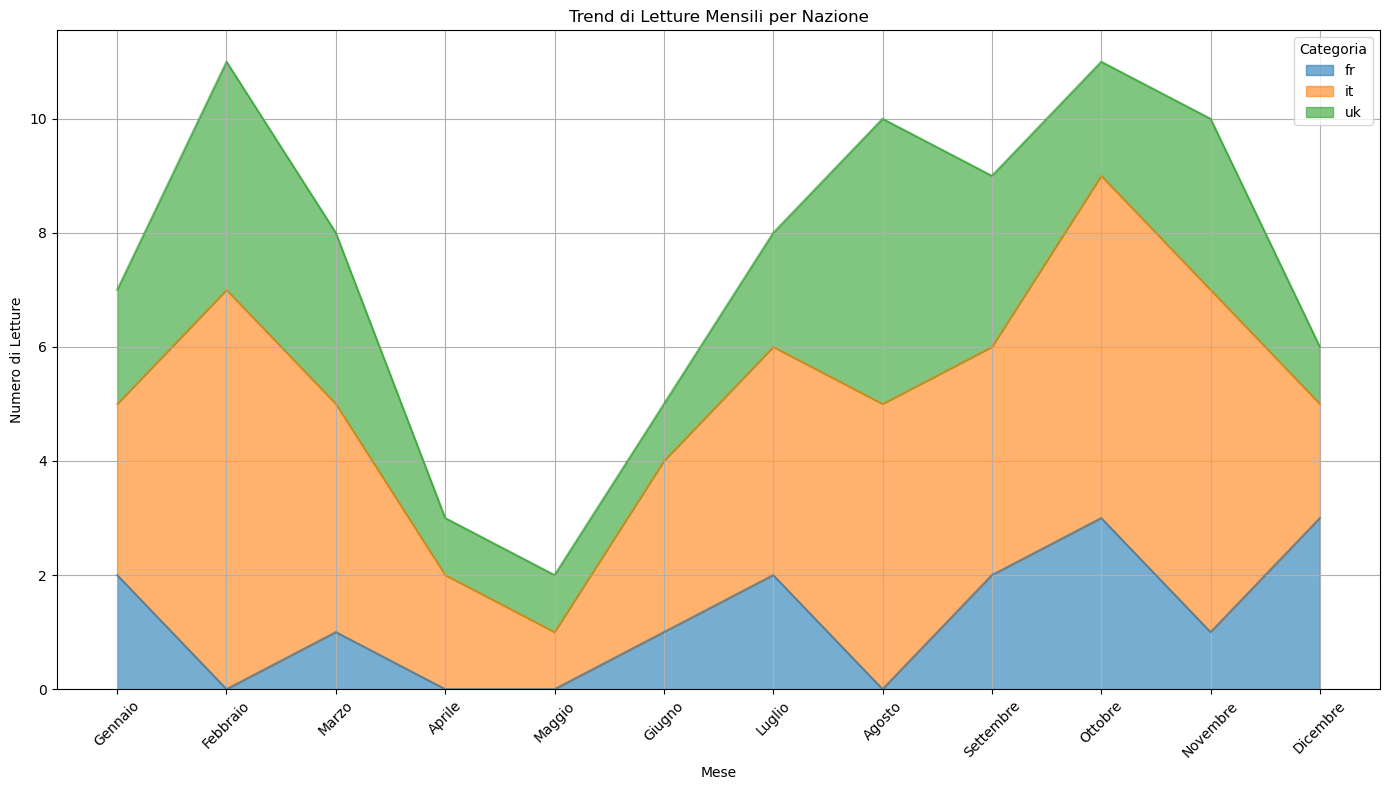

In [586]:
# Raggruppiamo per mese e nazione e contiamo il numero di letture
monthly_nation_counts = Papers_2021.groupby(['read_month', 'country']).size().unstack(fill_value=0)

# Ordiniamo l'indice del df secondo l'ordine dei mesi
month_order = list(calendar.month_name)[1:]

monthly_nation_counts = monthly_nation_counts.reindex(month_order, axis=0)
monthly_nation_counts

# Plot
fig, ax = plt.subplots(figsize=(14, 8))

# Linee di trend per ogni categoria
monthly_nation_counts.plot(kind='area', stacked=True, ax=ax, alpha=0.6)


ax.set_title('Trend di Letture Mensili per Nazione')
ax.set_xlabel('Mese')
ax.set_ylabel('Numero di Letture')
ax.set_xticks(range(len(mesi)))
ax.set_xticklabels(mesi, rotation=45)
ax.grid(True)

ax.legend(title='Categoria')

plt.tight_layout()
plt.savefig('11_country_monthly_readers.png')
plt.show()

L'**Area Plot** mostra come la grande maggioranza delle letture siano riferite a  lettori **`inglesi` o `italiani`**
>> gli **`italiani`** si mostrano i **più interessati alle letture**, evidenziando sempre **tassi superiori** rispetto agli **`inglesi`**, che mostrano un periodo di flessione **superiore** a quello italiano, nel **_caso primaverile_**
>>
>> i **`francesi`** si mostrano i **meno interessati** alla lettura, avendo periodi, come **Aprile, Maggio e Agosto**, in cui non vengono letti articoli

#### Focus 1: caso **`Inglese`**

In [587]:
monthly_english_cat_counts = Papers_2021.loc[Papers_2021['country']=='uk']
monthly_english_cat_counts

,read_date,user_uuid,category,journalist_id,language,length,country,subscription_date,platform,article_id,stars,read_month
2,2021-04-17,181,sport,114,en,short,uk,2020-12-09,pc,313130,1,April
8,2021-05-13,206,economy,110,en,long,uk,2020-11-07,tablet,233755,2,May
9,2021-10-27,6,economy,118,en,long,uk,2020-09-14,tablet,233155,1,October
10,2021-02-24,55,sport,117,en,medium,uk,2020-11-28,tablet,323950,2,February
11,2021-06-20,145,finance,111,en,long,uk,2020-01-13,mobile,633437,5,June
14,2021-07-24,94,economy,118,en,medium,uk,2020-03-24,mobile,223652,1,July
15,2021-03-08,94,art,106,en,short,uk,2020-03-24,tablet,513957,3,March
18,2021-09-25,60,sport,101,en,long,uk,2020-11-10,pc,333824,1,September
19,2021-12-13,76,lifestyle,122,en,long,uk,2020-05-14,mobile,133165,5,December
21,2021-09-04,202,news,122,en,long,uk,2020-02-04,tablet,63327,1,September


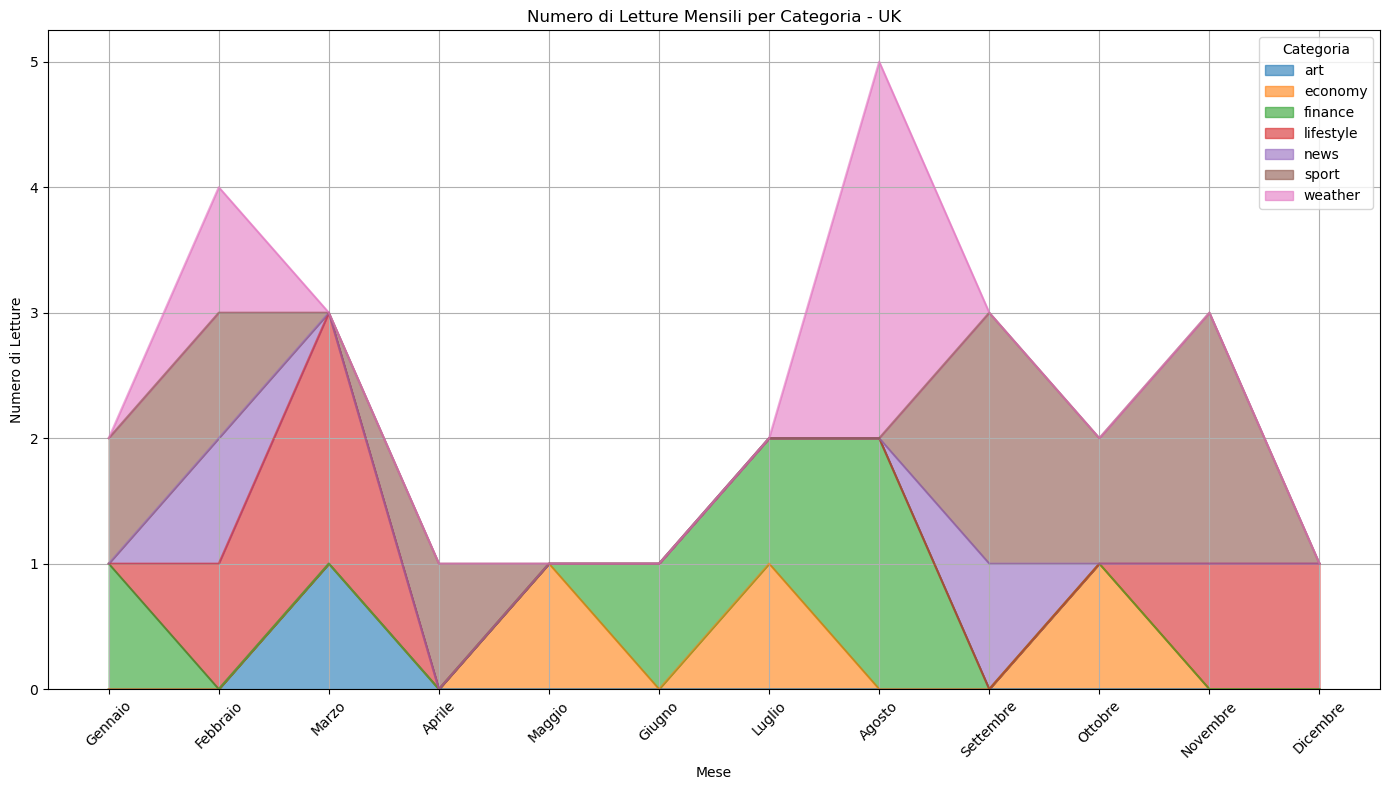

In [588]:
# Raggruppiamo per mese e categoria e contiamo il numero di letture

monthly_english_cat_counts = monthly_english_cat_counts.groupby(['read_month', 'category']).size().unstack(fill_value=0)

# Ordiniamo l'indice del df secondo l'ordine dei mesi
month_order = list(calendar.month_name)[1:]

monthly_english_cat_counts = monthly_english_cat_counts.reindex(month_order, axis=0)
monthly_english_cat_counts

# Plot
fig, ax = plt.subplots(figsize=(14, 8))

# Linee di trend per ogni categoria
monthly_english_cat_counts.plot(kind='area', stacked=True, ax=ax, alpha=0.6)


ax.set_title('Numero di Letture Mensili per Categoria - UK')
ax.set_xlabel('Mese')
ax.set_ylabel('Numero di Letture')
ax.set_xticks(range(len(mesi)))
ax.set_xticklabels(mesi, rotation=45)
ax.grid(True)

ax.legend(title='Categoria')

plt.tight_layout()

plt.savefig('12_english_monthly_readers_category.png')
plt.show()

Gli Inglesi mostrano degli interessi **non continui**:
>> leggono di **`economy`** con cadenza continua massimo **mensile**
>>
>> sono interessati all'**`art`** sono a **Marzo**
>>
>> sono più interessati allo **`sport`**, per quanto si mostri assenza di interesse da **`maggio` ad `Agosto`**. Il periodo di crescita dell'interesse coincide con la fine delle manifestazioni estive, in cui il **Leitmotiv** è stata la continua lotta con le compagini **Italiane** in ogni manifestazione.
>>
>> leggono di **`finance`** principalmente le periodo **estivo**
>>
>> si informano su **`lifestyle` e `weather`** sporadicamente

#### Focus 2: caso **`Italiano`**

In [589]:
monthly_italian_cat_counts = Papers_2021.loc[Papers_2021['country']=='it']
monthly_italian_cat_counts

,read_date,user_uuid,category,journalist_id,language,length,country,subscription_date,platform,article_id,stars,read_month
0,2021-02-25,243,art,117,it,short,it,2020-08-24,tablet,5128,3,February
1,2021-07-08,157,weather,111,it,long,it,2020-02-12,tablet,732766,5,July
3,2021-11-17,138,finance,111,it,short,it,2020-04-06,pc,612403,3,November
4,2021-10-04,94,news,103,it,long,it,2020-03-24,pc,632117,5,October
5,2021-07-27,69,finance,106,it,medium,it,2020-08-23,tablet,622487,4,July
6,2021-07-01,98,weather,103,it,long,it,2020-09-26,mobile,732585,5,July
12,2021-12-06,209,sport,102,it,long,it,2020-07-06,mobile,332441,1,December
13,2021-08-01,146,finance,104,it,long,it,2020-04-26,mobile,632262,5,August
16,2021-01-09,53,lifestyle,114,it,short,it,2020-10-08,pc,112451,2,January
17,2021-09-17,39,lifestyle,110,it,long,it,2020-08-03,pc,132524,3,September


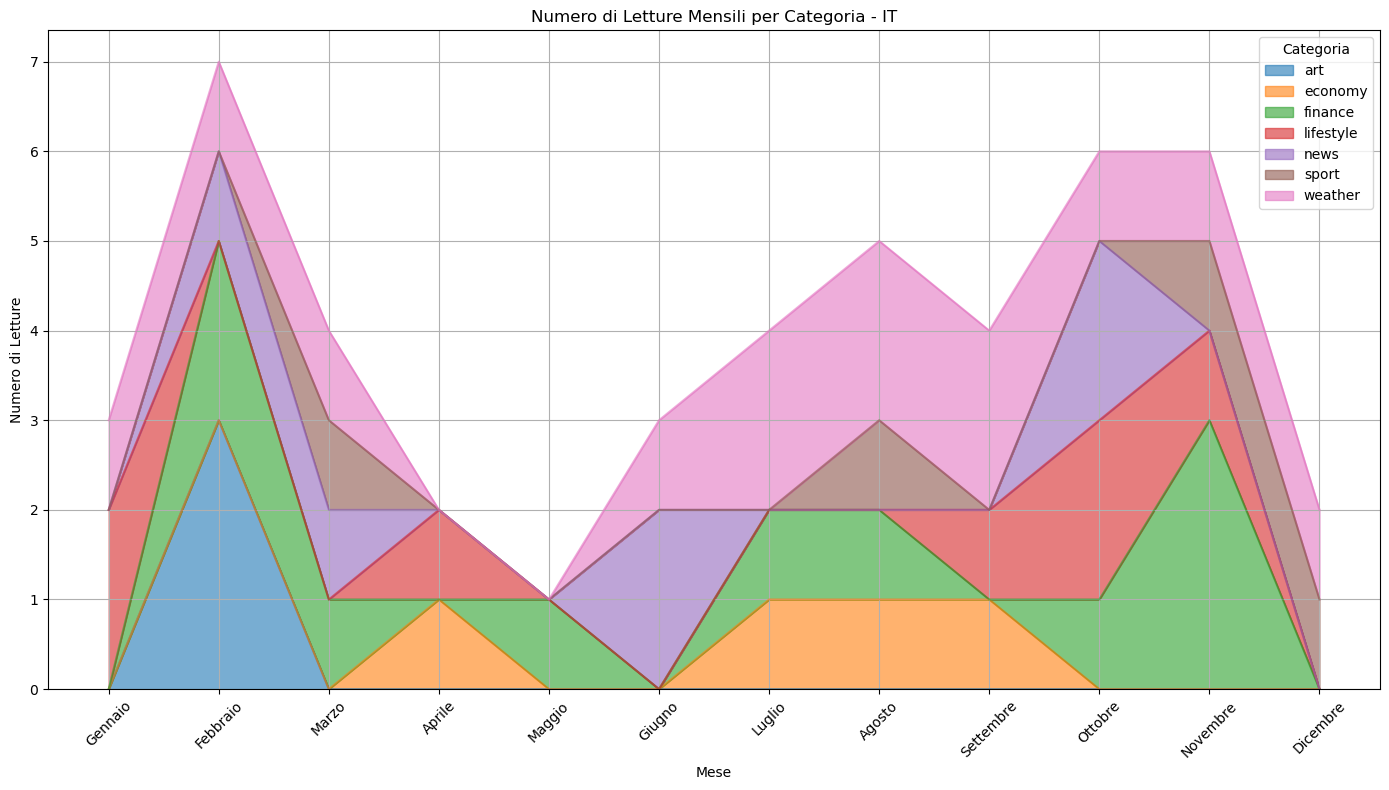

In [590]:
# Raggruppiamo per mese e categoria e contiamo il numero di letture

monthly_italian_cat_counts = monthly_italian_cat_counts.groupby(['read_month', 'category']).size().unstack(fill_value=0)

# Ordiniamo l'indice del df secondo l'ordine dei mesi
month_order = list(calendar.month_name)[1:]

monthly_italian_cat_counts = monthly_italian_cat_counts.reindex(month_order, axis=0)
monthly_italian_cat_counts

# Plot
fig, ax = plt.subplots(figsize=(14, 8))

# Linee di trend per ogni categoria
monthly_italian_cat_counts.plot(kind='area', stacked=True, ax=ax, alpha=0.6)


ax.set_title('Numero di Letture Mensili per Categoria - IT')
ax.set_xlabel('Mese')
ax.set_ylabel('Numero di Letture')
ax.set_xticks(range(len(mesi)))
ax.set_xticklabels(mesi, rotation=45)
ax.grid(True)

ax.legend(title='Categoria')

plt.tight_layout()
plt.savefig('12_italian_monthly_readers_category.png')
plt.show()

Si mostri, come nel caso italiano, l'interesse maggiore sia ascrivibile a tematiche **`weather`**, che ricopre tassi importanti su tutto l'anno, tranne l'assenza in **`Aprile` - `Maggio`**
>> si legge di **`finance`** con abbastanza continuità, salvo qualche assenza in alcuni mesi dell'anno;
>>
>> vi è discontinuità per **`news`, `sport`, e `lifestyle`**
>>
>> ci è una cadenza **mono-trimestrale** nel caso di **`economy`**
>>
>> **`art`** è relegata al solo periodo di **`febbraio`**

#### Tipologia di Utente: **IT**

In [591]:

IT = Papers_2021[Papers_2021['country']=='it']
IT

user_cat = IT.groupby(['user_uuid','category']).size().unstack(fill_value=0)
user_cat

category,art,economy,finance,lifestyle,news,sport,weather
user_uuid,,,,,,,
19,0,0,0,0,0,0,1
24,0,0,0,1,0,0,0
34,0,0,1,0,0,0,0
39,0,0,0,2,0,0,0
48,0,0,0,0,0,1,1
53,0,0,0,1,0,0,0
57,0,0,0,0,0,1,0
60,0,0,1,0,0,0,0
69,0,0,1,0,0,0,0


In [592]:
#lista di variabili da usare come riferimento per il raggruppamento
varlist = ['art','economy','finance','lifestyle','news','sport','weather']


counts = user_cat.groupby(varlist).size().reset_index(name='counts')

#estraggo i nomi delle colonne 'category' per cui, per ogni riga vale la
#condizione di "non nullità" (letture = 0) e le salvo come campo, per ogni
#riga. Le usero come parametri per gli indici di riga
new_index = counts.apply(lambda row: row[(row > 0)
                         & (row.index != 'counts')].index,
                         axis=1)

#converto in un DF la lista di questa estrazione
new_index = pd.DataFrame(new_index.tolist(), index=counts.index).iloc[:, :2]
new_index.columns = ['cat1','cat2']

#conversione a stringa degli indici originali
new_index.index = new_index.index.astype(str)
counts.index = counts.index.astype(str)

#salvo l'indice originale come variabile
counts['Original_Index'] = counts.index

#definisco un metodo che mi permette di valutare,
#attraverso i campi appena creati, quante e quali categorie
#sono lette dal singolo utente. Verrano usate per riclassificare
#l'indice e darne più chiarezza pr la Heat Map
def build_index(row):
    index = [row['Original_Index']]

    #se il campo delle variabili che contengono le categorie
    #lette dall'utente è non nullo, allora aggiunge
    #tale categoria alla tupla, da usare come indice
    
    if pd.notna(row['cat1']):
        index.append(row['cat1'])
    if pd.notna(row['cat2']):
        index.append(row['cat2'])
    return tuple(index)

#join per indici originali
counts = counts.join(new_index)

#creazione dell'istanza che contiene INDICE + LISTA CATEGORIE LETTE
new_id = counts.apply(build_index, axis=1)

#definizione del nuovo indice del DF PIVOT
counts.index = new_id

#aggiunta alla lista originale del raggruppamento di 'counts'
#per salvarlo come variabile del sotto dataset 'counts'
varlist.append('counts')

counts = counts[list(varlist)]
counts

,art,economy,finance,lifestyle,news,sport,weather,counts
"(0, weather)",0,0,0,0,0,0,1,8
"(1, sport)",0,0,0,0,0,1,0,2
"(2, sport, weather)",0,0,0,0,0,1,1,1
"(3, news)",0,0,0,0,1,0,0,3
"(4, news, weather)",0,0,0,0,2,0,1,1
"(5, lifestyle)",0,0,0,1,0,0,0,3
"(6, lifestyle, sport)",0,0,0,1,0,1,1,1
"(7, lifestyle)",0,0,0,2,0,0,0,1
"(8, finance)",0,0,1,0,0,0,0,5
"(9, finance, news)",0,0,1,0,1,0,0,1


In [593]:
merge_IT = IT.merge(user_cat, how='inner', on='user_uuid')
merge_IT

,read_date,user_uuid,category,journalist_id,language,length,country,subscription_date,platform,article_id,stars,read_month,art,economy,finance,lifestyle,news,sport,weather
0,2021-02-25,243,art,117,it,short,it,2020-08-24,tablet,5128,3,February,1,0,0,0,0,0,0
1,2021-07-08,157,weather,111,it,long,it,2020-02-12,tablet,732766,5,July,0,1,0,0,0,0,2
2,2021-04-14,157,economy,110,it,short,it,2020-02-12,pc,212930,5,April,0,1,0,0,0,0,2
3,2021-10-28,157,weather,116,it,short,it,2020-02-12,pc,712540,1,October,0,1,0,0,0,0,2
4,2021-11-17,138,finance,111,it,short,it,2020-04-06,pc,612403,3,November,0,0,1,1,0,0,0
5,2021-10-05,138,lifestyle,116,it,long,it,2020-04-06,mobile,132857,1,October,0,0,1,1,0,0,0
6,2021-10-04,94,news,103,it,long,it,2020-03-24,pc,632117,5,October,0,0,0,0,2,0,1
7,2021-02-02,94,news,105,it,medium,it,2020-03-24,mobile,622926,4,February,0,0,0,0,2,0,1
8,2021-02-19,94,weather,115,it,short,it,2020-03-24,mobile,712644,2,February,0,0,0,0,2,0,1
9,2021-07-27,69,finance,106,it,medium,it,2020-08-23,tablet,622487,4,July,0,0,1,0,0,0,0


In [594]:
merge_IT = merge_IT.merge(counts, how='inner', on=['art', 'economy', 'finance', 'lifestyle', 'news', 'sport', 'weather'])
merge_IT

,read_date,user_uuid,category,journalist_id,language,length,country,subscription_date,platform,article_id,stars,read_month,art,economy,finance,lifestyle,news,sport,weather,counts
0,2021-02-25,243,art,117,it,short,it,2020-08-24,tablet,5128,3,February,1,0,0,0,0,0,0,2
1,2021-02-21,230,art,112,it,long,it,2020-01-09,tablet,532353,4,February,1,0,0,0,0,0,0,2
2,2021-07-08,157,weather,111,it,long,it,2020-02-12,tablet,732766,5,July,0,1,0,0,0,0,2,1
3,2021-04-14,157,economy,110,it,short,it,2020-02-12,pc,212930,5,April,0,1,0,0,0,0,2,1
4,2021-10-28,157,weather,116,it,short,it,2020-02-12,pc,712540,1,October,0,1,0,0,0,0,2,1
5,2021-11-17,138,finance,111,it,short,it,2020-04-06,pc,612403,3,November,0,0,1,1,0,0,0,1
6,2021-10-05,138,lifestyle,116,it,long,it,2020-04-06,mobile,132857,1,October,0,0,1,1,0,0,0,1
7,2021-10-04,94,news,103,it,long,it,2020-03-24,pc,632117,5,October,0,0,0,0,2,0,1,1
8,2021-02-02,94,news,105,it,medium,it,2020-03-24,mobile,622926,4,February,0,0,0,0,2,0,1,1
9,2021-02-19,94,weather,115,it,short,it,2020-03-24,mobile,712644,2,February,0,0,0,0,2,0,1,1


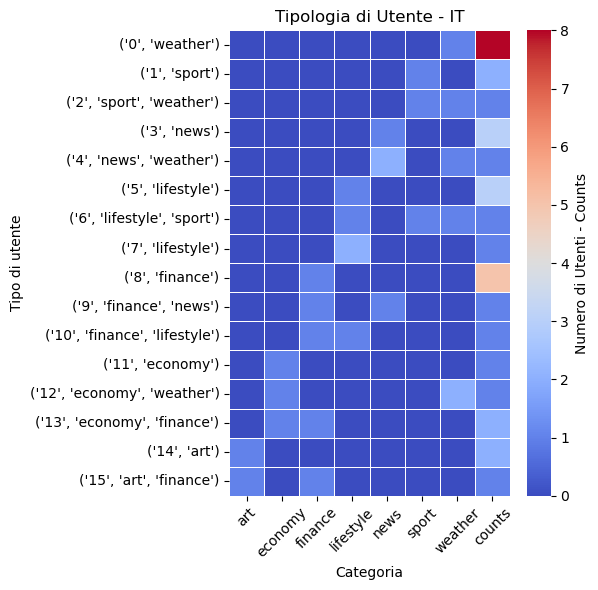

In [595]:
plt.figure(figsize=(6, 6))
heatmap = sns.heatmap(counts, annot=False, fmt="d", cmap="coolwarm", cbar_kws={'label': 'Numero di Utenti - Counts'}, linewidths=.5)


plt.title('Tipologia di Utente - IT')
plt.xlabel('Categoria')
plt.ylabel('Tipo di utente')
plt.xticks(rotation=45)
plt.yticks(rotation=0)

plt.tight_layout()

plt.savefig('13_user_type_IT.png')

plt.show()

Al fine di indirizzare l'indagine sotto forma di **strategia** e di **PERSONAS di utenti tipo**, usando **TABLEAU**, creo questa **Heat map** che evidenzi la **frequenza del numero di utenti** con gli interessi specifici in termini di **numero di letture per categoria**:

>> ci sono principalmente utenti che leggono **solo** di **`weather` o `finance`** seguiti da chi legge riguardo **solo** **`lifestyle` o `news`**
>>
>> infine vi sono una parte che leggono di **`sport`, `art`** **separatamente** e **`economy`e `finance`** **insieme**

#### Definizione delle **personas**

In [596]:
# Definizione delle personas
def define_personas(row):

    #inizializziamo il campo personas
    row['persona']=''

    #lista delle variabili di categoria da controllare sotto forma di COMBINAZIONE SEQUENZIALE
    list=['art', 'economy', 'finance', 'lifestyle', 'news', 'sport', 'weather']

    #conversione dell'elenco a lista
    values = row[list].tolist()

    # Conta il numero di zeri e non zeri
    num_zeros = values.count(0)
    num_non_zeros = len(values) - num_zeros

    #Sapendo che la sequenza deve contenere 5 o 6 ZERI, viene fatto fatto il controllo
    #ANCHE che l'unico valore diverso da 0 possa essere MAGGIORE (in quanto vi sono TIPI
    #DI UTENTE che leggono più di un articolo per categoria)

    ##controllo della correttezza della sequenza e della nazionalità
    ##E poi successiva classificazione della PERSONAS
    
    #sport
    if (num_zeros == 6 and values[5] > 0):
        row['persona'] = 'Sports Enthusiast - Gimbo Tamberi'
    
    #weather    
    elif (num_zeros == 6 and values[6] > 0):
        row['persona'] = 'Weather Guru - Mario Giuliacci'

    #lifestyle
    elif (num_zeros == 6 and values[3] > 0):
        row['persona'] = 'Lifestyle Addicted - Chiara Ferragni'

    #news
    elif (num_zeros == 6 and values[4] > 0):
        row['persona'] = 'News Reader - Enrico Mentana'

    #finance
    elif (num_zeros == 6 and values[2] > 0):
        row['persona'] = 'Finance Professional - Mario Draghi'

    #art
    elif (num_zeros == 6 and values[0] > 0):
        row['persona'] = 'Art Expert - Alessandro Orlando'
    
    #finance and economy
    elif (num_zeros == 5 and values[1] > 0 and values[2] > 0):
        row['persona'] = 'Economy and Finance Researcher - Prof. Filippo Cossetti'

    else:
        row['persona'] = 'Casual Reader - Chiara'

    return row



Papers_2021_pers_IT = merge_IT.apply(define_personas, axis = 1)

# Salva il dataset con le personas
Papers_2021_pers_IT.to_csv('df_with_personas.csv', index=False)

In [597]:
Papers_2021_pers_IT

,read_date,user_uuid,category,journalist_id,language,length,country,subscription_date,platform,article_id,...,read_month,art,economy,finance,lifestyle,news,sport,weather,counts,persona
0,2021-02-25,243,art,117,it,short,it,2020-08-24,tablet,5128,...,February,1,0,0,0,0,0,0,2,Art Expert - Alessandro Orlando
1,2021-02-21,230,art,112,it,long,it,2020-01-09,tablet,532353,...,February,1,0,0,0,0,0,0,2,Art Expert - Alessandro Orlando
2,2021-07-08,157,weather,111,it,long,it,2020-02-12,tablet,732766,...,July,0,1,0,0,0,0,2,1,Casual Reader - Chiara
3,2021-04-14,157,economy,110,it,short,it,2020-02-12,pc,212930,...,April,0,1,0,0,0,0,2,1,Casual Reader - Chiara
4,2021-10-28,157,weather,116,it,short,it,2020-02-12,pc,712540,...,October,0,1,0,0,0,0,2,1,Casual Reader - Chiara
5,2021-11-17,138,finance,111,it,short,it,2020-04-06,pc,612403,...,November,0,0,1,1,0,0,0,1,Casual Reader - Chiara
6,2021-10-05,138,lifestyle,116,it,long,it,2020-04-06,mobile,132857,...,October,0,0,1,1,0,0,0,1,Casual Reader - Chiara
7,2021-10-04,94,news,103,it,long,it,2020-03-24,pc,632117,...,October,0,0,0,0,2,0,1,1,Casual Reader - Chiara
8,2021-02-02,94,news,105,it,medium,it,2020-03-24,mobile,622926,...,February,0,0,0,0,2,0,1,1,Casual Reader - Chiara
9,2021-02-19,94,weather,115,it,short,it,2020-03-24,mobile,712644,...,February,0,0,0,0,2,0,1,1,Casual Reader - Chiara
